In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

In [ ]:
# Load the datasets
data = pd.read_csv("/content/POWER_Point_Daily_20150331_20210331_033d36N_006d83E_LST.csv", skiprows=22)
sici_data = pd.read_csv("/content/(SICI)POWER_Point_Daily_20150331_20210331_033d36N_006d83E_LST.csv", skiprows=9)

## Data Describtion

* GWETTOP: MERRA-2 Surface Soil Wetness (water content in the upper 5-10 cm of soil)
* GWETROOT: MERRA-2 Root Zone Soil Wetness (water that is available to plants, generally considered to be in the upper 200 cm of soil)
* GWETPROF: MERRA-2 Profile Soil Moisture (the amount of water (in mm of water depth) present in a depth of one meter of soi)
* T2M: MERRA-2 Temperature at 2 Meters (Celsius)
* T2MDEW: MERRA-2 Dew/Frost Point at 2 Meters (Celsius)
* T2MWET: MERRA-2 Wet Bulb Temperature at 2 Meters (Celsius)
* TS: MERRA-2 Earth Skin Temperature (Celsius)
* QV2M: MERRA-2 Specific Humidity at 2 Meters (g/kg)
* RH2M: MERRA-2 Relative Humidity at 2 Meters (%)
* PRECTOTCORR: MERRA-2 Precipitation Corrected (mm/day)
* PS: MERRA-2 Surface Pressure (kPa)
* WS2M: MERRA-2 Wind Speed at 2 Meters (m/s)
* WS2M_RANGE: MERRA-2 Wind Speed at 2 Meters Range (m/s)
* WD2M: MERRA-2 Wind Direction at 2 Meters (Degrees)

In [ ]:
data.head()

,YEAR,DOY,T2M,TS,QV2M,RH2M,PRECTOTCORR,WS2M,PS,GWETTOP,GWETROOT,GWETPROF,T2MDEW,T2MWET,WD2M,WS2M_RANGE
0,2015,90,21.82,20.58,4.88,32.25,0.0,1.52,101.43,0.17,0.16,0.17,3.62,12.72,139.12,4.41
1,2015,91,22.17,21.91,4.94,32.00,0.0,1.73,101.21,0.16,0.16,0.17,3.85,13.01,73.31,2.69
2,2015,92,18.08,18.63,4.82,40.94,0.0,2.96,101.32,0.16,0.16,0.17,3.19,10.63,79.56,5.20
3,2015,93,18.33,19.54,4.82,40.12,0.0,1.73,101.09,0.16,0.16,0.17,3.33,10.83,144.25,3.98
4,2015,94,20.48,21.08,5.07,35.81,0.0,3.37,100.38,0.16,0.16,0.17,3.68,12.08,176.81,4.09


## Data treatment

In [ ]:
df = data.copy()

In [ ]:
df2 = sici_data.copy()

In [ ]:
# Add columns for month (MO) and day (DY)
df['MO'] = pd.to_datetime(df['DOY'], format='%j').dt.month
df['DY'] = pd.to_datetime(df['DOY'], format='%j').dt.day

# Display the modified DataFrame
df

,YEAR,DOY,T2M,TS,QV2M,RH2M,PRECTOTCORR,WS2M,PS,GWETTOP,GWETROOT,GWETPROF,T2MDEW,T2MWET,WD2M,WS2M_RANGE,MO,DY
0,2015,90,21.82,20.58,4.88,32.25,0.0,1.52,101.43,0.17,0.16,0.17,3.62,12.72,139.12,4.41,3,31
1,2015,91,22.17,21.91,4.94,32.00,0.0,1.73,101.21,0.16,0.16,0.17,3.85,13.01,73.31,2.69,4,1
2,2015,92,18.08,18.63,4.82,40.94,0.0,2.96,101.32,0.16,0.16,0.17,3.19,10.63,79.56,5.20,4,2
3,2015,93,18.33,19.54,4.82,40.12,0.0,1.73,101.09,0.16,0.16,0.17,3.33,10.83,144.25,3.98,4,3
4,2015,94,20.48,21.08,5.07,35.81,0.0,3.37,100.38,0.16,0.16,0.17,3.68,12.08,176.81,4.09,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188,2021,86,17.24,17.96,2.56,22.44,0.0,2.52,101.91,0.09,0.11,0.12,-5.08,6.08,195.00,2.56,3,27
2189,2021,87,19.11,17.98,2.14,16.50,0.0,1.64,102.00,0.09,0.11,0.12,-7.20,5.95,151.00,2.53,3,28
2190,2021,88,18.74,18.67,3.05,24.38,0.0,2.40,102.00,0.09,0.11,0.12,-2.76,7.99,114.31,2.51,3,29
2191,2021,89,18.94,19.59,5.00,41.31,0.0,2.97,101.80,0.09,0.11,0.12,3.71,11.33,151.12,5.10,3,30


In [ ]:
# Define the desired column order
desired_columns_order = ['YEAR', 'DOY', 'MO', 'DY', 'GWETTOP', 'GWETROOT', 'GWETPROF', 'T2M', 'T2MDEW', 'T2MWET',
                          'TS', 'QV2M', 'RH2M', 'PRECTOTCORR', 'PS', 'WS2M', 'WS2M_RANGE', 'WD2M']

# Reorder the columns
df = df[desired_columns_order]
df

,YEAR,DOY,MO,DY,GWETTOP,GWETROOT,GWETPROF,T2M,T2MDEW,T2MWET,TS,QV2M,RH2M,PRECTOTCORR,PS,WS2M,WS2M_RANGE,WD2M
0,2015,90,3,31,0.17,0.16,0.17,21.82,3.62,12.72,20.58,4.88,32.25,0.0,101.43,1.52,4.41,139.12
1,2015,91,4,1,0.16,0.16,0.17,22.17,3.85,13.01,21.91,4.94,32.00,0.0,101.21,1.73,2.69,73.31
2,2015,92,4,2,0.16,0.16,0.17,18.08,3.19,10.63,18.63,4.82,40.94,0.0,101.32,2.96,5.20,79.56
3,2015,93,4,3,0.16,0.16,0.17,18.33,3.33,10.83,19.54,4.82,40.12,0.0,101.09,1.73,3.98,144.25
4,2015,94,4,4,0.16,0.16,0.17,20.48,3.68,12.08,21.08,5.07,35.81,0.0,100.38,3.37,4.09,176.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2188,2021,86,3,27,0.09,0.11,0.12,17.24,-5.08,6.08,17.96,2.56,22.44,0.0,101.91,2.52,2.56,195.00
2189,2021,87,3,28,0.09,0.11,0.12,19.11,-7.20,5.95,17.98,2.14,16.50,0.0,102.00,1.64,2.53,151.00
2190,2021,88,3,29,0.09,0.11,0.12,18.74,-2.76,7.99,18.67,3.05,24.38,0.0,102.00,2.40,2.51,114.31
2191,2021,89,3,30,0.09,0.11,0.12,18.94,3.71,11.33,19.59,5.00,41.31,0.0,101.80,2.97,5.10,151.12


In [ ]:
# Assuming your DataFrame is named 'df' 31/03/2015 is one value from the month and can be considered as an outlier
df = df.drop(df[(df['YEAR'] == 2015) & (df['MO'] == 3) & (df['DY'] == 31)].index)

In [ ]:
df = pd.merge(df, df2, on=['YEAR', 'MO', 'DY'])

In [ ]:
df

,YEAR,DOY,MO,DY,GWETTOP,GWETROOT,GWETPROF,T2M,T2MDEW,T2MWET,TS,QV2M,RH2M,PRECTOTCORR,PS,WS2M,WS2M_RANGE,WD2M,ALLSKY_KT
0,2015,91,4,1,0.16,0.16,0.17,22.17,3.85,13.01,21.91,4.94,32.00,0.0,101.21,1.73,2.69,73.31,0.73
1,2015,92,4,2,0.16,0.16,0.17,18.08,3.19,10.63,18.63,4.82,40.94,0.0,101.32,2.96,5.20,79.56,0.73
2,2015,93,4,3,0.16,0.16,0.17,18.33,3.33,10.83,19.54,4.82,40.12,0.0,101.09,1.73,3.98,144.25,0.75
3,2015,94,4,4,0.16,0.16,0.17,20.48,3.68,12.08,21.08,5.07,35.81,0.0,100.38,3.37,4.09,176.81,0.64
4,2015,95,4,5,0.15,0.15,0.17,21.29,4.37,12.83,22.48,5.25,34.56,0.0,99.94,2.35,4.63,110.50,0.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,2021,86,3,27,0.09,0.11,0.12,17.24,-5.08,6.08,17.96,2.56,22.44,0.0,101.91,2.52,2.56,195.00,0.67
2188,2021,87,3,28,0.09,0.11,0.12,19.11,-7.20,5.95,17.98,2.14,16.50,0.0,102.00,1.64,2.53,151.00,0.71
2189,2021,88,3,29,0.09,0.11,0.12,18.74,-2.76,7.99,18.67,3.05,24.38,0.0,102.00,2.40,2.51,114.31,0.68
2190,2021,89,3,30,0.09,0.11,0.12,18.94,3.71,11.33,19.59,5.00,41.31,0.0,101.80,2.97,5.10,151.12,0.45


In [ ]:
def calculate_es(T):
      """Calculate saturation vapor pressure."""
      result = 0.6108 * np.exp((17.27 * T) / (T + 237.3))
      return round(result, 2)

def calculate_ea(es, RH2M):
    """Calculate actual vapor pressure."""
    result = (RH2M/100) * es
    return round(result, 2)

In [ ]:
# Add columns for saturation vapor pressure and actual vapor pressure
df['ES'] = calculate_es(df['T2M']) # saturation vapor pressure
df['EA'] = calculate_ea(df['ES'], df['RH2M']) # actual vapor pressure
# Display the updated DataFrame
df

,YEAR,DOY,MO,DY,GWETTOP,GWETROOT,GWETPROF,T2M,T2MDEW,T2MWET,...,QV2M,RH2M,PRECTOTCORR,PS,WS2M,WS2M_RANGE,WD2M,ALLSKY_KT,ES,EA
0,2015,91,4,1,0.16,0.16,0.17,22.17,3.85,13.01,...,4.94,32.00,0.0,101.21,1.73,2.69,73.31,0.73,2.67,0.85
1,2015,92,4,2,0.16,0.16,0.17,18.08,3.19,10.63,...,4.82,40.94,0.0,101.32,2.96,5.20,79.56,0.73,2.07,0.85
2,2015,93,4,3,0.16,0.16,0.17,18.33,3.33,10.83,...,4.82,40.12,0.0,101.09,1.73,3.98,144.25,0.75,2.11,0.85
3,2015,94,4,4,0.16,0.16,0.17,20.48,3.68,12.08,...,5.07,35.81,0.0,100.38,3.37,4.09,176.81,0.64,2.41,0.86
4,2015,95,4,5,0.15,0.15,0.17,21.29,4.37,12.83,...,5.25,34.56,0.0,99.94,2.35,4.63,110.50,0.66,2.53,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,2021,86,3,27,0.09,0.11,0.12,17.24,-5.08,6.08,...,2.56,22.44,0.0,101.91,2.52,2.56,195.00,0.67,1.97,0.44
2188,2021,87,3,28,0.09,0.11,0.12,19.11,-7.20,5.95,...,2.14,16.50,0.0,102.00,1.64,2.53,151.00,0.71,2.21,0.36
2189,2021,88,3,29,0.09,0.11,0.12,18.74,-2.76,7.99,...,3.05,24.38,0.0,102.00,2.40,2.51,114.31,0.68,2.16,0.53
2190,2021,89,3,30,0.09,0.11,0.12,18.94,3.71,11.33,...,5.00,41.31,0.0,101.80,2.97,5.10,151.12,0.45,2.19,0.90


In [ ]:
def calculate_slope_curve(T):
    """Calculate the slope of the saturation vapor pressure curve."""
    result = (4098 * calculate_es(T)) / ((T + 237.3) ** 2)
    return round(result, 2)

In [ ]:
df['SC'] = calculate_slope_curve(df['T2M']) # slope of the saturation vapor pressure curve
# Display the updated DataFrame
df

,YEAR,DOY,MO,DY,GWETTOP,GWETROOT,GWETPROF,T2M,T2MDEW,T2MWET,...,RH2M,PRECTOTCORR,PS,WS2M,WS2M_RANGE,WD2M,ALLSKY_KT,ES,EA,SC
0,2015,91,4,1,0.16,0.16,0.17,22.17,3.85,13.01,...,32.00,0.0,101.21,1.73,2.69,73.31,0.73,2.67,0.85,0.16
1,2015,92,4,2,0.16,0.16,0.17,18.08,3.19,10.63,...,40.94,0.0,101.32,2.96,5.20,79.56,0.73,2.07,0.85,0.13
2,2015,93,4,3,0.16,0.16,0.17,18.33,3.33,10.83,...,40.12,0.0,101.09,1.73,3.98,144.25,0.75,2.11,0.85,0.13
3,2015,94,4,4,0.16,0.16,0.17,20.48,3.68,12.08,...,35.81,0.0,100.38,3.37,4.09,176.81,0.64,2.41,0.86,0.15
4,2015,95,4,5,0.15,0.15,0.17,21.29,4.37,12.83,...,34.56,0.0,99.94,2.35,4.63,110.50,0.66,2.53,0.87,0.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,2021,86,3,27,0.09,0.11,0.12,17.24,-5.08,6.08,...,22.44,0.0,101.91,2.52,2.56,195.00,0.67,1.97,0.44,0.12
2188,2021,87,3,28,0.09,0.11,0.12,19.11,-7.20,5.95,...,16.50,0.0,102.00,1.64,2.53,151.00,0.71,2.21,0.36,0.14
2189,2021,88,3,29,0.09,0.11,0.12,18.74,-2.76,7.99,...,24.38,0.0,102.00,2.40,2.51,114.31,0.68,2.16,0.53,0.14
2190,2021,89,3,30,0.09,0.11,0.12,18.94,3.71,11.33,...,41.31,0.0,101.80,2.97,5.10,151.12,0.45,2.19,0.90,0.14


In [ ]:
# Function to calculate specific humidity (q) from QV2M
def calculate_specific_humidity(QV2M):
    result = QV2M / (1 - QV2M)
    return round(result, 2)

# Function to calculate specific heat at constant pressure (c_p)
def calculate_specific_heat(T, q):
    # Constants
    c_pd = 1005  # Specific heat of dry air at constant pressure (J/(kg·°C))
    R_v = 461    # Specific gas constant for water vapor (J/(kg·°C))
    result = c_pd + (q * R_v / T)
    return round(result, 2)

In [ ]:
# Applying the functions to the dataframe
df['S_H'] = calculate_specific_humidity(df['QV2M']) # Specific Humidity
df['S_HT'] = calculate_specific_heat(df['T2M'], df['S_H']) # Specific Heat

In [ ]:
df

,YEAR,DOY,MO,DY,GWETTOP,GWETROOT,GWETPROF,T2M,T2MDEW,T2MWET,...,PS,WS2M,WS2M_RANGE,WD2M,ALLSKY_KT,ES,EA,SC,S_H,S_HT
0,2015,91,4,1,0.16,0.16,0.17,22.17,3.85,13.01,...,101.21,1.73,2.69,73.31,0.73,2.67,0.85,0.16,-1.25,979.01
1,2015,92,4,2,0.16,0.16,0.17,18.08,3.19,10.63,...,101.32,2.96,5.20,79.56,0.73,2.07,0.85,0.13,-1.26,972.87
2,2015,93,4,3,0.16,0.16,0.17,18.33,3.33,10.83,...,101.09,1.73,3.98,144.25,0.75,2.11,0.85,0.13,-1.26,973.31
3,2015,94,4,4,0.16,0.16,0.17,20.48,3.68,12.08,...,100.38,3.37,4.09,176.81,0.64,2.41,0.86,0.15,-1.25,976.86
4,2015,95,4,5,0.15,0.15,0.17,21.29,4.37,12.83,...,99.94,2.35,4.63,110.50,0.66,2.53,0.87,0.16,-1.24,978.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,2021,86,3,27,0.09,0.11,0.12,17.24,-5.08,6.08,...,101.91,2.52,2.56,195.00,0.67,1.97,0.44,0.12,-1.64,961.15
2188,2021,87,3,28,0.09,0.11,0.12,19.11,-7.20,5.95,...,102.00,1.64,2.53,151.00,0.71,2.21,0.36,0.14,-1.88,959.65
2189,2021,88,3,29,0.09,0.11,0.12,18.74,-2.76,7.99,...,102.00,2.40,2.51,114.31,0.68,2.16,0.53,0.14,-1.49,968.35
2190,2021,89,3,30,0.09,0.11,0.12,18.94,3.71,11.33,...,101.80,2.97,5.10,151.12,0.45,2.19,0.90,0.14,-1.25,974.57


In [ ]:
# NET RADIATION OF THE MONTH 22 Year Climatology Average From : https://power.larc.nasa.gov/data-access-viewer/
# Data for each month
data = {
    'Month': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'],
    'Net_Radiation_MJ/m2/day': [13.356, 20.232, 23.688, 28.872, 27.756, 29.88, 30.564, 30.42, 24.804, 18.432, 14.112, 11.628]
}

# Create DataFrame
Rn_monthly = pd.DataFrame(data)

# Print the DataFrame
Rn_monthly

,Month,Net_Radiation_MJ/m2/day
0,1,13.356
1,2,20.232
2,3,23.688
3,4,28.872
4,5,27.756
5,6,29.880
6,7,30.564
7,8,30.420
8,9,24.804
9,10,18.432


In [ ]:
# Function to get the number of days in a month
def get_days_in_month(year, month):
    month_days = df[(df['YEAR'] == year) & (df['MO'] == month)]['DY'].nunique()
    return month_days

In [ ]:
# Extract unique combinations of year and month
unique_months = df[['YEAR', 'MO']].drop_duplicates()
unique_months

,YEAR,MO
0,2015,4
30,2015,5
61,2015,6
91,2015,7
122,2015,8
...,...,...
2041,2020,11
2071,2020,12
2102,2021,1
2133,2021,2


In [ ]:
# Apply the function to create a new column 'Days_in_Month'
unique_months['Days_in_Month'] = unique_months.apply(lambda row: get_days_in_month(row['YEAR'], row['MO']), axis=1)

# Print the result
print(unique_months[['YEAR', 'MO', 'Days_in_Month']])

      YEAR  MO  Days_in_Month
0     2015   4             30
30    2015   5             31
61    2015   6             30
91    2015   7             31
122   2015   8             31
...    ...  ..            ...
2041  2020  11             30
2071  2020  12             31
2102  2021   1             31
2133  2021   2             28
2161  2021   3             31

[72 rows x 3 columns]


In [ ]:
Rn_monthly.rename(columns={'Month': 'MO'}, inplace=True)

In [ ]:
# Define the function
def distribute_net_radiation_sici(sici, Rn_monthly, days_in_month):
    """
    Distribute Net Radiation based on Sky Insolation Clearness Index (SICI).

    Parameters:
    - sici: Sky Insolation Clearness Index
    - Rn_monthly: Monthly Total Net Radiation
    - days_in_month: Number of days in the month

    Returns:
    - Rn_daily: Estimated Daily Net Radiation
    """

    # Calculate Rn_daily using SICI
    Rn_daily = sici * (Rn_monthly / days_in_month)

    return Rn_daily

In [ ]:
# Convert 'MO' column to integers
Rn_monthly['MO'] = Rn_monthly['MO'].astype(int)
unique_months['MO'] = unique_months['MO'].astype(int)
# Merge the dataframes on 'Month'
merged_df = pd.merge(Rn_monthly, unique_months, on='MO', how='left')

In [ ]:
merged_df

,MO,Net_Radiation_MJ/m2/day,YEAR,Days_in_Month
0,1,13.356,2016,31
1,1,13.356,2017,31
2,1,13.356,2018,31
3,1,13.356,2019,31
4,1,13.356,2020,31
...,...,...,...,...
67,12,11.628,2016,31
68,12,11.628,2017,31
69,12,11.628,2018,31
70,12,11.628,2019,31


In [ ]:
merged_df = pd.merge(df, merged_df, on=['MO', 'YEAR'], how='left')

In [ ]:
merged_df

,YEAR,DOY,MO,DY,GWETTOP,GWETROOT,GWETPROF,T2M,T2MDEW,T2MWET,...,WS2M_RANGE,WD2M,ALLSKY_KT,ES,EA,SC,S_H,S_HT,Net_Radiation_MJ/m2/day,Days_in_Month
0,2015,91,4,1,0.16,0.16,0.17,22.17,3.85,13.01,...,2.69,73.31,0.73,2.67,0.85,0.16,-1.25,979.01,28.872,30
1,2015,92,4,2,0.16,0.16,0.17,18.08,3.19,10.63,...,5.20,79.56,0.73,2.07,0.85,0.13,-1.26,972.87,28.872,30
2,2015,93,4,3,0.16,0.16,0.17,18.33,3.33,10.83,...,3.98,144.25,0.75,2.11,0.85,0.13,-1.26,973.31,28.872,30
3,2015,94,4,4,0.16,0.16,0.17,20.48,3.68,12.08,...,4.09,176.81,0.64,2.41,0.86,0.15,-1.25,976.86,28.872,30
4,2015,95,4,5,0.15,0.15,0.17,21.29,4.37,12.83,...,4.63,110.50,0.66,2.53,0.87,0.16,-1.24,978.15,28.872,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,2021,86,3,27,0.09,0.11,0.12,17.24,-5.08,6.08,...,2.56,195.00,0.67,1.97,0.44,0.12,-1.64,961.15,23.688,31
2188,2021,87,3,28,0.09,0.11,0.12,19.11,-7.20,5.95,...,2.53,151.00,0.71,2.21,0.36,0.14,-1.88,959.65,23.688,31
2189,2021,88,3,29,0.09,0.11,0.12,18.74,-2.76,7.99,...,2.51,114.31,0.68,2.16,0.53,0.14,-1.49,968.35,23.688,31
2190,2021,89,3,30,0.09,0.11,0.12,18.94,3.71,11.33,...,5.10,151.12,0.45,2.19,0.90,0.14,-1.25,974.57,23.688,31


In [ ]:
# Calculate rn_daily
df['rn_daily'] = distribute_net_radiation_sici(merged_df['ALLSKY_KT'], merged_df['Net_Radiation_MJ/m2/day'], merged_df['Days_in_Month'])

In [ ]:
df['Days_in_Month'] = merged_df['Days_in_Month']

In [ ]:
df

,YEAR,DOY,MO,DY,GWETTOP,GWETROOT,GWETPROF,T2M,T2MDEW,T2MWET,...,WS2M_RANGE,WD2M,ALLSKY_KT,ES,EA,SC,S_H,S_HT,rn_daily,Days_in_Month
0,2015,91,4,1,0.16,0.16,0.17,22.17,3.85,13.01,...,2.69,73.31,0.73,2.67,0.85,0.16,-1.25,979.01,0.702552,30
1,2015,92,4,2,0.16,0.16,0.17,18.08,3.19,10.63,...,5.20,79.56,0.73,2.07,0.85,0.13,-1.26,972.87,0.702552,30
2,2015,93,4,3,0.16,0.16,0.17,18.33,3.33,10.83,...,3.98,144.25,0.75,2.11,0.85,0.13,-1.26,973.31,0.721800,30
3,2015,94,4,4,0.16,0.16,0.17,20.48,3.68,12.08,...,4.09,176.81,0.64,2.41,0.86,0.15,-1.25,976.86,0.615936,30
4,2015,95,4,5,0.15,0.15,0.17,21.29,4.37,12.83,...,4.63,110.50,0.66,2.53,0.87,0.16,-1.24,978.15,0.635184,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,2021,86,3,27,0.09,0.11,0.12,17.24,-5.08,6.08,...,2.56,195.00,0.67,1.97,0.44,0.12,-1.64,961.15,0.511966,31
2188,2021,87,3,28,0.09,0.11,0.12,19.11,-7.20,5.95,...,2.53,151.00,0.71,2.21,0.36,0.14,-1.88,959.65,0.542532,31
2189,2021,88,3,29,0.09,0.11,0.12,18.74,-2.76,7.99,...,2.51,114.31,0.68,2.16,0.53,0.14,-1.49,968.35,0.519608,31
2190,2021,89,3,30,0.09,0.11,0.12,18.94,3.71,11.33,...,5.10,151.12,0.45,2.19,0.90,0.14,-1.25,974.57,0.343858,31


In [ ]:
def calculate_soil_heat_flux(net_radiation):
    # The value of α can vary depending on the soil type,
    # land cover, and other environmental factors. Typically,
    # it falls in the range of 0.1 to 0.3. This fraction is
    # essentially an empirical coefficient that captures
    # the efficiency with which the soil conducts heat
    # compared to the total incoming radiation.
    # Generate a random fraction alpha between 0.1 and 0.3
    alpha = random.uniform(0.1, 0.3)

    # Calculate soil heat flux density (G)
    soil_heat_flux = alpha * net_radiation

    return soil_heat_flux

In [ ]:
# Apply the function to the 'rn_daily' column in df
df['soil_heat_flux'] = df['rn_daily'].apply(calculate_soil_heat_flux)

In [ ]:
df

,YEAR,DOY,MO,DY,GWETTOP,GWETROOT,GWETPROF,T2M,T2MDEW,T2MWET,...,WD2M,ALLSKY_KT,ES,EA,SC,S_H,S_HT,rn_daily,Days_in_Month,soil_heat_flux
0,2015,91,4,1,0.16,0.16,0.17,22.17,3.85,13.01,...,73.31,0.73,2.67,0.85,0.16,-1.25,979.01,0.702552,30,0.070915
1,2015,92,4,2,0.16,0.16,0.17,18.08,3.19,10.63,...,79.56,0.73,2.07,0.85,0.13,-1.26,972.87,0.702552,30,0.206954
2,2015,93,4,3,0.16,0.16,0.17,18.33,3.33,10.83,...,144.25,0.75,2.11,0.85,0.13,-1.26,973.31,0.721800,30,0.127028
3,2015,94,4,4,0.16,0.16,0.17,20.48,3.68,12.08,...,176.81,0.64,2.41,0.86,0.15,-1.25,976.86,0.615936,30,0.145004
4,2015,95,4,5,0.15,0.15,0.17,21.29,4.37,12.83,...,110.50,0.66,2.53,0.87,0.16,-1.24,978.15,0.635184,30,0.095574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,2021,86,3,27,0.09,0.11,0.12,17.24,-5.08,6.08,...,195.00,0.67,1.97,0.44,0.12,-1.64,961.15,0.511966,31,0.151234
2188,2021,87,3,28,0.09,0.11,0.12,19.11,-7.20,5.95,...,151.00,0.71,2.21,0.36,0.14,-1.88,959.65,0.542532,31,0.077528
2189,2021,88,3,29,0.09,0.11,0.12,18.74,-2.76,7.99,...,114.31,0.68,2.16,0.53,0.14,-1.49,968.35,0.519608,31,0.095556
2190,2021,89,3,30,0.09,0.11,0.12,18.94,3.71,11.33,...,151.12,0.45,2.19,0.90,0.14,-1.25,974.57,0.343858,31,0.097357


In [ ]:
def calculate_ps(c_p, PS):
      """Calculate the psychrometric constant."""
      result = 0.00163 * PS / c_p
      # print(result)
      return result

In [ ]:
# Assuming 'S_HT' is the column name for c_p in your DataFrame
df['psychrometric_constant'] = calculate_ps(df['S_HT'], df['PS'])

In [ ]:
# df has the required columns including 'rn_daily', 'soil_heat_flux', 'T2M', 'WS2M', 'RH2M', 'PS', 'ES', 'EA', 'SC', 'S_H', 'S_HT', and other necessary columns

def penman_monteith(row):
    R_n = row['rn_daily']  # net radiation
    G = row['soil_heat_flux']  # soil heat flux
    T = row['T2M']  # temperature at 2 meters
    u2 = row['WS2M']  # Replace with the actual column name for wind speed at 2 meters
    es = row['ES']  # saturation vapor pressure
    ea = row['EA']  # actual vapor pressure
    delta = row['SC']  # slope of the saturation vapor pressure curve
    gamma = row['psychrometric_constant']  # psychrometric constant

    rn_g = (R_n - G)
    es_ea = (es - ea)
    numerator = 0.408 * delta * rn_g + gamma * (900 / (T + 273)) * u2 * es_ea

    denominator = delta + gamma * (1 + 0.34 * u2)

    # Calculate ET0
    et0 = numerator / denominator

    # print("ET0 = ", et0, " *** RN_G = ", rn_g, " *** es_ea = ", es_ea)

    return et0

In [ ]:
# Apply the function to each row in the DataFrame
df['ET0'] = df.apply(penman_monteith, axis=1)

In [ ]:
# Print the resulting DataFrame
df

,YEAR,DOY,MO,DY,GWETTOP,GWETROOT,GWETPROF,T2M,T2MDEW,T2MWET,...,ES,EA,SC,S_H,S_HT,rn_daily,Days_in_Month,soil_heat_flux,psychrometric_constant,ET0
0,2015,91,4,1,0.16,0.16,0.17,22.17,3.85,13.01,...,2.67,0.85,0.16,-1.25,979.01,0.702552,30,0.070915,0.000169,0.267372
1,2015,92,4,2,0.16,0.16,0.17,18.08,3.19,10.63,...,2.07,0.85,0.13,-1.26,972.87,0.702552,30,0.206954,0.000170,0.216218
2,2015,93,4,3,0.16,0.16,0.17,18.33,3.33,10.83,...,2.11,0.85,0.13,-1.26,973.31,0.721800,30,0.127028,0.000169,0.250917
3,2015,94,4,4,0.16,0.16,0.17,20.48,3.68,12.08,...,2.41,0.86,0.15,-1.25,976.86,0.615936,30,0.145004,0.000167,0.209525
4,2015,95,4,5,0.15,0.15,0.17,21.29,4.37,12.83,...,2.53,0.87,0.16,-1.24,978.15,0.635184,30,0.095574,0.000167,0.232144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,2021,86,3,27,0.09,0.11,0.12,17.24,-5.08,6.08,...,1.97,0.44,0.12,-1.64,961.15,0.511966,31,0.151234,0.000173,0.163960
2188,2021,87,3,28,0.09,0.11,0.12,19.11,-7.20,5.95,...,2.21,0.36,0.14,-1.88,959.65,0.542532,31,0.077528,0.000173,0.200902
2189,2021,88,3,29,0.09,0.11,0.12,18.74,-2.76,7.99,...,2.16,0.53,0.14,-1.49,968.35,0.519608,31,0.095556,0.000172,0.187396
2190,2021,89,3,30,0.09,0.11,0.12,18.94,3.71,11.33,...,2.19,0.90,0.14,-1.25,974.57,0.343858,31,0.097357,0.000170,0.114657


In [ ]:
df_plotting = df.copy()

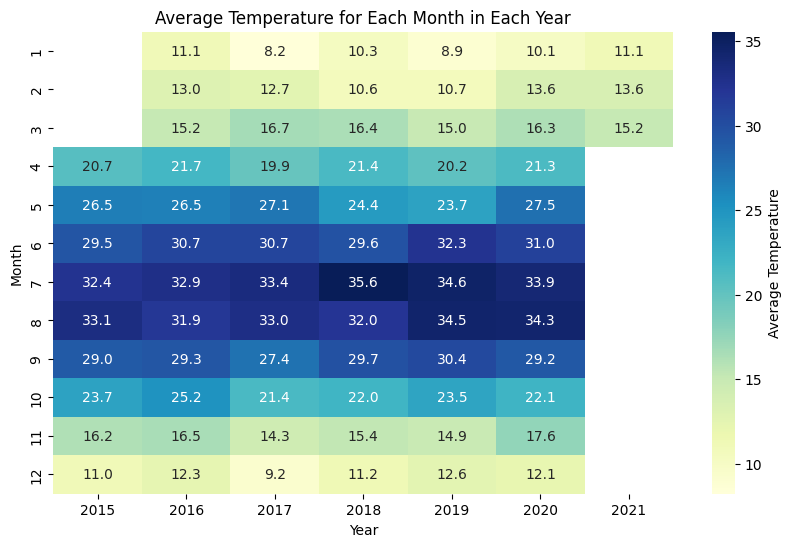

Average Temperature for Each Month in Each Year:


,YEAR,MO,T2M
0,2015,4,20.713333
1,2015,5,26.545806
2,2015,6,29.462000
3,2015,7,32.350323
4,2015,8,33.146774
...,...,...,...
67,2020,11,17.583667
68,2020,12,12.094516
69,2021,1,11.105806
70,2021,2,13.628214


In [ ]:
# Convert 'month' column to categorical for proper ordering
df_plotting['month'] = pd.Categorical(df_plotting['MO'], categories=range(1, 13), ordered=True)

# Group by 'year' and 'month', calculate average temperature
average_temperature = df_plotting.groupby(['YEAR', 'MO'])['T2M'].mean().reset_index()

# Pivot the DataFrame for better plotting
average_temperature_pivot = average_temperature.pivot(index='MO', columns='YEAR', values='T2M')

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(average_temperature_pivot, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Average Temperature'})
plt.title('Average Temperature for Each Month in Each Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()

# Display the table
print("Average Temperature for Each Month in Each Year:")
average_temperature

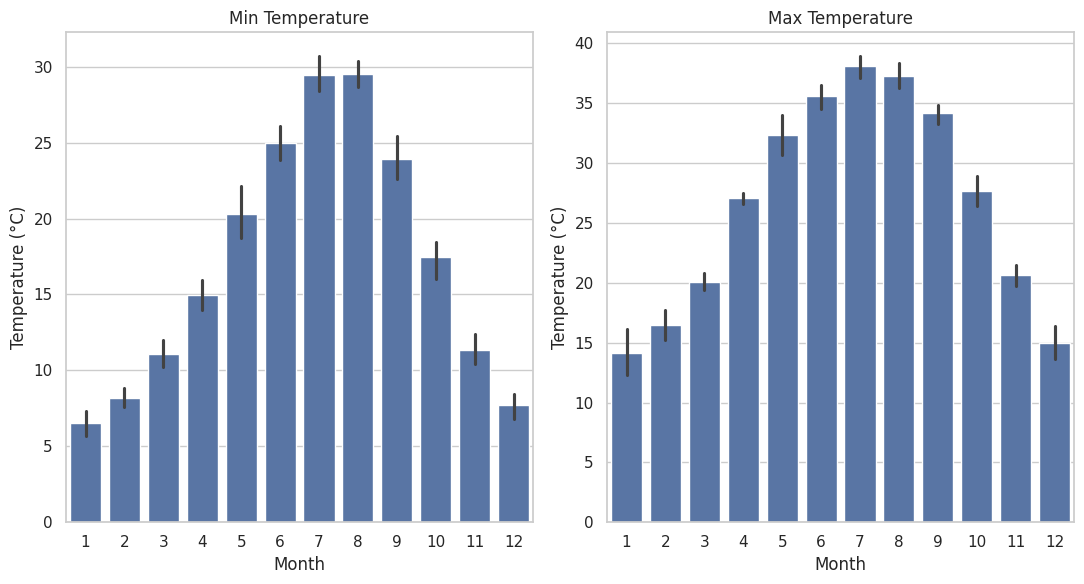

In [ ]:
# Create a pivot table for min and max temperature
pivot_table = df_plotting.pivot_table(index='YEAR', columns='MO', values='T2M',
                                      aggfunc=['min', 'max']).stack()

# Reset the index to convert MultiIndex to a simple index
pivot_table = pivot_table.reset_index()

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot Min Temperature
plt.figure(figsize=(11, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='MO', y='min', data=pivot_table,)
plt.title('Min Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')

# Plot Max Temperature
plt.subplot(1, 2, 2)
sns.barplot(x='MO', y='max', data=pivot_table,)
plt.title('Max Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')

plt.tight_layout()
plt.show()

In [ ]:
pivot_table

,YEAR,MO,min,max
0,2015,4,12.68,27.73
1,2015,5,21.42,31.87
2,2015,6,24.23,33.10
3,2015,7,28.21,36.15
4,2015,8,28.56,36.88
...,...,...,...,...
67,2020,11,13.53,21.53
68,2020,12,5.99,17.33
69,2021,1,4.69,18.52
70,2021,2,7.10,15.85


In [ ]:
# Add a new column "soil_type" with the value "sandy"
df["soil_type"] = "sandy"

In [ ]:
df

,YEAR,DOY,MO,DY,GWETTOP,GWETROOT,GWETPROF,T2M,T2MDEW,T2MWET,...,EA,SC,S_H,S_HT,rn_daily,Days_in_Month,soil_heat_flux,psychrometric_constant,ET0,soil_type
0,2015,91,4,1,0.16,0.16,0.17,22.17,3.85,13.01,...,0.85,0.16,-1.25,979.01,0.702552,30,0.101132,0.000169,0.255064,sandy
1,2015,92,4,2,0.16,0.16,0.17,18.08,3.19,10.63,...,0.85,0.13,-1.26,972.87,0.702552,30,0.120134,0.000170,0.251548,sandy
2,2015,93,4,3,0.16,0.16,0.17,18.33,3.33,10.83,...,0.85,0.13,-1.26,973.31,0.721800,30,0.151582,0.000169,0.240920,sandy
3,2015,94,4,4,0.16,0.16,0.17,20.48,3.68,12.08,...,0.86,0.15,-1.25,976.86,0.615936,30,0.155612,0.000167,0.205208,sandy
4,2015,95,4,5,0.15,0.15,0.17,21.29,4.37,12.83,...,0.87,0.16,-1.24,978.15,0.635184,30,0.075400,0.000167,0.240360,sandy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,2021,86,3,27,0.09,0.11,0.12,17.24,-5.08,6.08,...,0.44,0.12,-1.64,961.15,0.511966,31,0.102271,0.000173,0.183883,sandy
2188,2021,87,3,28,0.09,0.11,0.12,19.11,-7.20,5.95,...,0.36,0.14,-1.88,959.65,0.542532,31,0.097903,0.000173,0.192605,sandy
2189,2021,88,3,29,0.09,0.11,0.12,18.74,-2.76,7.99,...,0.53,0.14,-1.49,968.35,0.519608,31,0.108783,0.000172,0.182012,sandy
2190,2021,89,3,30,0.09,0.11,0.12,18.94,3.71,11.33,...,0.90,0.14,-1.25,974.57,0.343858,31,0.076265,0.000170,0.123241,sandy


In [ ]:
df_weather = df.copy()

In [ ]:
df['date'] = pd.to_datetime(dict(year=df.YEAR, month=df.MO, day=df.DY))

In [ ]:
# Show temperature based on day and month
def filter_data_from_date(day, month, df):
    # Check if the provided day and month are valid
    try:
        day = int(day)
        month = int(month)
        if not (1 <= day <= 31 and 1 <= month <= 12):
            raise ValueError("Invalid day or month")
    except ValueError as e:
        print(f"Error: {e}")
        return None


    # Filter the DataFrame based on the input date
    filtered_df = df[(df['DY'] >= day) & (df['MO'] >= month)]

    return filtered_df

# Example usage:
# and you want to filter data for day=1 and month=1
result_df = filter_data_from_date(4, 3, df)

# Display the resulting DataFrame
result_df

,YEAR,DOY,MO,DY,GWETTOP,GWETROOT,GWETPROF,T2M,T2MDEW,T2MWET,...,SC,S_H,S_HT,rn_daily,Days_in_Month,soil_heat_flux,psychrometric_constant,ET0,soil_type,date
3,2015,94,4,4,0.16,0.16,0.17,20.48,3.68,12.08,...,0.15,-1.25,976.86,0.615936,30,0.155612,0.000167,0.205208,sandy,2015-04-04
4,2015,95,4,5,0.15,0.15,0.17,21.29,4.37,12.83,...,0.16,-1.24,978.15,0.635184,30,0.075400,0.000167,0.240360,sandy,2015-04-05
5,2015,96,4,6,0.16,0.15,0.17,17.87,7.84,12.86,...,0.13,-1.18,974.56,0.500448,30,0.114364,0.000168,0.182666,sandy,2015-04-06
6,2015,97,4,7,0.16,0.15,0.17,15.51,2.02,8.77,...,0.11,-1.29,966.66,0.567816,30,0.057056,0.000171,0.238455,sandy,2015-04-07
7,2015,98,4,8,0.15,0.15,0.17,12.68,-4.20,4.24,...,0.10,-1.57,947.92,0.731424,30,0.159246,0.000175,0.249516,sandy,2015-04-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,2021,86,3,27,0.09,0.11,0.12,17.24,-5.08,6.08,...,0.12,-1.64,961.15,0.511966,31,0.102271,0.000173,0.183883,sandy,2021-03-27
2188,2021,87,3,28,0.09,0.11,0.12,19.11,-7.20,5.95,...,0.14,-1.88,959.65,0.542532,31,0.097903,0.000173,0.192605,sandy,2021-03-28
2189,2021,88,3,29,0.09,0.11,0.12,18.74,-2.76,7.99,...,0.14,-1.49,968.35,0.519608,31,0.108783,0.000172,0.182012,sandy,2021-03-29
2190,2021,89,3,30,0.09,0.11,0.12,18.94,3.71,11.33,...,0.14,-1.25,974.57,0.343858,31,0.076265,0.000170,0.123241,sandy,2021-03-30


In [ ]:
df.columns

Index(['YEAR', 'DOY', 'MO', 'DY', 'GWETTOP', 'GWETROOT', 'GWETPROF', 'T2M',
       'T2MDEW', 'T2MWET', 'TS', 'QV2M', 'RH2M', 'PRECTOTCORR', 'PS', 'WS2M',
       'WS2M_RANGE', 'WD2M', 'ALLSKY_KT', 'ES', 'EA', 'SC', 'S_H', 'S_HT',
       'rn_daily', 'Days_in_Month', 'soil_heat_flux', 'psychrometric_constant',
       'ET0', 'soil_type', 'date'],
      dtype='object')

In [ ]:
def calculate_gdd(temperature, base_temperature=0):
        """
        Calculate Growing Degree Days (GDD) based on daily temperature.

        Parameters:
        - temperature: Daily temperature in Celsius.
        - base_temperature: Base temperature for GDD calculation (default is 0°C).

        Returns:
        - gdd: Daily Growing Degree Days.
        """
        gdd = max(0, temperature - base_temperature)
        return gdd

In [ ]:
df['gdd'] = df['T2M'].apply(calculate_gdd)
df

,YEAR,DOY,MO,DY,GWETTOP,GWETROOT,GWETPROF,T2M,T2MDEW,T2MWET,...,S_H,S_HT,rn_daily,Days_in_Month,soil_heat_flux,psychrometric_constant,ET0,soil_type,date,gdd
0,2015,91,4,1,0.16,0.16,0.17,22.17,3.85,13.01,...,-1.25,979.01,0.702552,30,0.101132,0.000169,0.255064,sandy,2015-04-01,22.17
1,2015,92,4,2,0.16,0.16,0.17,18.08,3.19,10.63,...,-1.26,972.87,0.702552,30,0.120134,0.000170,0.251548,sandy,2015-04-02,18.08
2,2015,93,4,3,0.16,0.16,0.17,18.33,3.33,10.83,...,-1.26,973.31,0.721800,30,0.151582,0.000169,0.240920,sandy,2015-04-03,18.33
3,2015,94,4,4,0.16,0.16,0.17,20.48,3.68,12.08,...,-1.25,976.86,0.615936,30,0.155612,0.000167,0.205208,sandy,2015-04-04,20.48
4,2015,95,4,5,0.15,0.15,0.17,21.29,4.37,12.83,...,-1.24,978.15,0.635184,30,0.075400,0.000167,0.240360,sandy,2015-04-05,21.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,2021,86,3,27,0.09,0.11,0.12,17.24,-5.08,6.08,...,-1.64,961.15,0.511966,31,0.102271,0.000173,0.183883,sandy,2021-03-27,17.24
2188,2021,87,3,28,0.09,0.11,0.12,19.11,-7.20,5.95,...,-1.88,959.65,0.542532,31,0.097903,0.000173,0.192605,sandy,2021-03-28,19.11
2189,2021,88,3,29,0.09,0.11,0.12,18.74,-2.76,7.99,...,-1.49,968.35,0.519608,31,0.108783,0.000172,0.182012,sandy,2021-03-29,18.74
2190,2021,89,3,30,0.09,0.11,0.12,18.94,3.71,11.33,...,-1.25,974.57,0.343858,31,0.076265,0.000170,0.123241,sandy,2021-03-30,18.94


In [ ]:
class WheatGrowthModel:
    def __init__(self):
        self.gdd_accumulated = 0
        self.growth_stages = []


    def calculate_gdd(self, temperature, base_temperature=0):
        """
        Calculate Growing Degree Days (GDD) based on daily temperature.

        Parameters:
        - temperature: Daily temperature in Celsius.
        - base_temperature: Base temperature for GDD calculation (default is 0°C).

        Returns:
        - gdd: Daily Growing Degree Days.
        """
        gdd = max(0, temperature - base_temperature)
        return gdd

    def calculate_water_needs(self, temperature):
        """
        Calculate random water needs based on daily temperature.

        Returns:
        - water_needs: Grass water needs in millimeters. + 10% for wheat
        """
        if temperature < 15:
            base_water_needs = random.uniform(4, 6)
        elif 15 <= temperature <= 25:
            base_water_needs = random.uniform(7, 8)
        else:
            base_water_needs = random.uniform(9, 10)
        # Apply 10% increase for wheat
        water_needs = base_water_needs * 1.1

        # if 0.5 <= stage <= 6.0:
        #     # 50% of needed water
        #     water_needs = 0.5 * water_needs
        # elif 7.0 <= stage <= 10.2:
        #     # 100% of needed water
        #     water_needs = water_needs
        # elif 11.0 <= stage <= 12.0:
        #     # 25% of needed water
        #     water_needs = 0.25 water_needs

        return water_needs

    def simulate_growth(self, data, start_day, start_month):
        """
        Simulate wheat crop growth based on daily temperature.
        Parameters:
        - data: DataFrame with a column 'T2M' representing daily temperatures in Celsius.
        Returns:
        - growth_stages: List of growth stages reached each day.
        """
        filtered_data = filter_data_from_date(start_day, start_month, data)
        for _, row in filtered_data.iterrows():
            temperature = row['T2M']
            daily_gdd = self.calculate_gdd(temperature)
            self.gdd_accumulated += daily_gdd

            # Check growth stages and update
            stage, description, gdd_required, accumulated_gdd = self.get_growth_stage_info()

            # Calculate random water needs
            water_needs = self.calculate_water_needs(temperature)

            # Append growth stage information
            self.growth_stages.append({
                "Day": len(self.growth_stages) + 1,
                "Temperature": temperature,
                "Water Needs": water_needs,
                "Stage": stage,
                "Description": description,
                "GDD Required": gdd_required,
                "Accumulated GDD": accumulated_gdd,
                "Days for Next Stage": self.get_days_for_next_stage(daily_gdd),
                "Duration of Previous Stage": self.get_duration_of_previous_stage(),
            })

            if stage == "Done":
              break

        return self.growth_stages

    def get_growth_stage_info(self):
        """
        Get information about the current growth stage based on accumulated GDD.

        Returns:
        - stage: Growth stage.
        - description: Description of the growth stage.
        - gdd_required: GDD required for the current stage.
        - accumulated_gdd: Total accumulated GDD.
        """
        if self.gdd_accumulated < 180:
            stage, description, gdd_required = 0.5, "Emergence Date", 180
        elif self.gdd_accumulated < 252:
            stage, description, gdd_required = 1.0, "Leaf 1 fully extended", 72
        elif self.gdd_accumulated < 395:
            stage, description, gdd_required = 2.0, "Leaf 2 fully extended", 143
        elif self.gdd_accumulated < 538:
            stage, description, gdd_required = 3.0, "Leaf 3 (Tillers Begin To Emerge)", 143
        elif self.gdd_accumulated < 681:
            stage, description, gdd_required = 4.0, "Leaf 4 fully extended", 143
        elif self.gdd_accumulated < 824:
            stage, description, gdd_required = 5.0, "Leaf 5 (Tillering ends)", 143
        elif self.gdd_accumulated < 967:
            stage, description, gdd_required = 6.0, "Leaf 6 (Tillering ends)", 143
        elif self.gdd_accumulated < 1110:
            stage, description, gdd_required = 7.0, "Leaf 7 fully extended", 143
        elif self.gdd_accumulated < 1181:
            stage, description, gdd_required = 7.5, "Flag Leaf Visible", 71
        elif self.gdd_accumulated < 1255:
            stage, description, gdd_required = 8.0, "Flag Leaf Emerged", 72
        elif self.gdd_accumulated < 1396:
            stage, description, gdd_required = 9.0, "Boot Swelling Begins", 143
        elif self.gdd_accumulated < 1539:
            stage, description, gdd_required = 10.0, "Boot Completed", 143
        elif self.gdd_accumulated < 1567:
            stage, description, gdd_required = 10.2, "Heading Begins", 28
        elif self.gdd_accumulated < 1682:
            stage, description, gdd_required = 11.0, "Headed (Head Extension Begins)", 115
        elif self.gdd_accumulated < 1739:
            stage, description, gdd_required = 11.4, "Flowering Begins", 57
        elif self.gdd_accumulated < 1768:
            stage, description, gdd_required = 11.6, "Flowering Completed", 29
        elif self.gdd_accumulated < 1825:
            stage, description, gdd_required = 12.0, "Kernel Watery Ripe", 57
        else:
            stage, description, gdd_required = "Done", "Crop Growth Complete", 0

        return stage, description, gdd_required, self.gdd_accumulated

    def get_days_for_next_stage(self, daily_gdd):
        """
        Get the estimated number of days required to reach the next growth stage.

        Returns:
        - days_for_next_stage: Estimated days required for the next stage.
        """
        next_stage_info = self.get_growth_stage_info()
        next_stage_gdd_required = next_stage_info[2]
        return next_stage_gdd_required / max(1, daily_gdd)

    def get_duration_of_previous_stage(self):
        """
        Get the duration of the previous growth stage.

        Returns:
        - duration_of_previous_stage: Duration of the previous stage.
        """
        if len(self.growth_stages) > 1:
            previous_stage_info = self.growth_stages[0]
            return len(self.growth_stages) - previous_stage_info["Day"] + 1
        else:
            return 0

In [ ]:
wheat_model = WheatGrowthModel()
growth_stages_result = wheat_model.simulate_growth(df, 1, 10)

# Create DataFrame from the results
columns = ["Day", "Temperature", "Water Needs", "Stage", "Description", "GDD Required", "Accumulated GDD", "Days for Next Stage", "Duration of Previous Stage"]
result_df = pd.DataFrame(growth_stages_result, columns=columns)

# Display the DataFrame
result_df

,Day,Temperature,Water Needs,Stage,Description,GDD Required,Accumulated GDD,Days for Next Stage,Duration of Previous Stage
0,1,24.90,8.202464,0.5,Emergence Date,180,24.90,7.228916,0
1,2,23.52,8.409754,0.5,Emergence Date,180,48.42,7.653061,0
2,3,23.77,8.476495,0.5,Emergence Date,180,72.19,7.572570,2
3,4,26.41,10.850667,0.5,Emergence Date,180,98.60,6.815600,3
4,5,28.09,10.025500,0.5,Emergence Date,180,126.69,6.407974,4
...,...,...,...,...,...,...,...,...,...
97,98,27.26,10.338098,11.4,Flowering Begins,57,1723.29,2.090976,97
98,99,25.56,10.845935,11.6,Flowering Completed,29,1748.85,1.134585,98
99,100,27.01,10.212961,12.0,Kernel Watery Ripe,57,1775.86,2.110330,99
100,101,26.41,10.763140,12.0,Kernel Watery Ripe,57,1802.27,2.158273,100


In [ ]:
import gym
from gym import spaces
import numpy as np

class WheatGrowthEnv(gym.Env):
    def __init__(self, data_frame, start_month, start_day, end_month, end_day):
        super(WheatGrowthEnv, self).__init__()

        # DataFrame containing daily temperature data
        self.data_frame = data_frame

        # Define action space (irrigation amount)
        self.action_space = spaces.Discrete(11)  # Discrete actions from 0 to 10

        # Define observation space
        self.observation_space = spaces.Dict({
            "current_day": spaces.Discrete(365),
            "current_month": spaces.Discrete(12),
            "current_month_day": spaces.Discrete(31),
            "current_year": spaces.Discrete(3000),
            "daily_temperature": spaces.Box(low=0, high=40, shape=(1,), dtype=np.float32),
            "growth_stage": spaces.Box(low=0, high=13, shape=(1,), dtype=np.float32),
            "accumulated_gdd": spaces.Box(low=0, high=3000, shape=(1,), dtype=np.float32),
            "accumulated_scarcity": spaces.Box(low=0, high=1000, shape=(1,), dtype=np.float32),
            "accumulated_excess": spaces.Box(low=0, high=1000, shape=(1,), dtype=np.float32),
            "soil_moisture_content": spaces.Box(low=0, high=100, shape=(1,), dtype=np.float32),
            "water_needs": spaces.Box(low=0, high=11, shape=(1,), dtype=np.float32),
            "etc": spaces.Box(low=0, high=2, shape=(1,), dtype=np.float32),
            "rainfall": spaces.Box(low=0, high=11, shape=(1,), dtype=np.float32),
            "harvest": spaces.Box(low=0, high=100, shape=(1,), dtype=np.float32),
        })

        # Initialize state variables
        self.current_day = 0
        self.current_month_day = start_day
        self.current_month = start_month
        self.current_year = 2015  # You can set the initial year as needed
        self.growth_stage = 0.0
        self.accumulated_gdd = 0
        self.accumulated_excess = 0
        self.accumulated_scarcity = 0
        self.soil_moisture_content = 0
        self.irrigation_amount = 0
        self.harvest = 100

        # Start and end dates
        self.start_month = start_month
        self.start_day = start_day
        self.end_month = end_month
        self.end_day = end_day


    def reset(self):
        # Reset state variables
        self.current_day = 0
        self.current_month_day = self.start_day
        self.current_month = self.start_month
        self.current_year = 2015  # You can set the initial year as needed
        self.growth_stage = 0.0
        self.accumulated_gdd = 0
        self.soil_moisture_content = 0
        self.irrigation_amount = 0
        self.daily_temperature = 0
        self.et0 = 0.0
        self.etc = 0.0
        self.rainfall = 0
        self.water_needs = 0.0

        # Find the index corresponding to the start date
        start_index = self.data_frame[(self.data_frame['MO'] == self.start_month) & (self.data_frame['DY'] == self.start_day)].index[0]

        # Set current day to the start date index
        self.current_day = start_index

        # Return initial observation
        return self._get_observation()

    def step(self, action):
        # Get daily temperature from DataFrame based on the current day
        self.daily_temperature = self._get_daily_temperature()

        # Simulate growth for one day
        self._simulate_growth(action)

        # Return observation, reward, done, and info
        observation = self._get_observation()
        reward = self._calculate_reward(self.irrigation_amount, self.water_needs, self.soil_moisture_content)
        stage_info = self._get_growth_stage_info(self.accumulated_gdd)
        self.growth_stage = stage_info[0]
        done = self.growth_stage >= 12 # or self.soil_moisture_content <= 0
        info = {}

        return observation, reward, done, info

    def _get_daily_temperature(self):
        # Get daily temperature from DataFrame based on the current day
        if self.current_day < len(self.data_frame):
            return self.data_frame.at[self.current_day, 'T2M']
        else:
            return 0

    def _get_gdd(self):
      # Get daily gdd from dataframe on the current day
      if self.current_day < len(self.data_frame):
        return self.data_frame.at[self.current_day, 'gdd']
      else:
        return 0

    def _get_et0(self):
      # get daily et0
      if self.current_day < len(self.data_frame):
        return self.data_frame.at[self.current_day, 'ET0']

    def _get_rainfall(self):
      # get daily et0
      if self.current_day < len(self.data_frame):
        return self.data_frame.at[self.current_day, 'PRECTOTCORR']
      else:
        return 0

    def _get_surface_soil_wetness(self):
      # get daily gwettop / GWETTOP: MERRA-2 Surface Soil Wetness
      if self.current_day < len(self.data_frame):
        return self.data_frame.at[self.current_day, 'GWETTOP']
      else:
        return 0

    def _get_growth_stage_info(self, gdd_accumulated):

        """
        Get information about the current growth stage based on accumulated GDD.

        Returns:
        - stage: Growth stage.
        - description: Description of the growth stage.
        - gdd_required: GDD required for the current stage.
        - accumulated_gdd: Total accumulated GDD.
        """

        if gdd_accumulated < 180:
            stage, description, gdd_required = 0.5, "Emergence Date", 180
        elif gdd_accumulated < 252:
            stage, description, gdd_required = 1.0, "Leaf 1 fully extended", 72
        elif gdd_accumulated < 395:
            stage, description, gdd_required = 2.0, "Leaf 2 fully extended", 143
        elif gdd_accumulated < 538:
            stage, description, gdd_required = 3.0, "Leaf 3 (Tillers Begin To Emerge)", 143
        elif gdd_accumulated < 681:
            stage, description, gdd_required = 4.0, "Leaf 4 fully extended", 143
        elif gdd_accumulated < 824:
            stage, description, gdd_required = 5.0, "Leaf 5 (Tillering ends)", 143
        elif gdd_accumulated < 967:
            stage, description, gdd_required = 6.0, "Leaf 6 (Tillering ends)", 143
        elif gdd_accumulated < 1110:
            stage, description, gdd_required = 7.0, "Leaf 7 fully extended", 143
        elif gdd_accumulated < 1181:
            stage, description, gdd_required = 7.5, "Flag Leaf Visible", 71
        elif gdd_accumulated < 1255:
            stage, description, gdd_required = 8.0, "Flag Leaf Emerged", 72
        elif gdd_accumulated < 1396:
            stage, description, gdd_required = 9.0, "Boot Swelling Begins", 143
        elif gdd_accumulated < 1539:
            stage, description, gdd_required = 10.0, "Boot Completed", 143
        elif gdd_accumulated < 1567:
            stage, description, gdd_required = 10.2, "Heading Begins", 28
        elif gdd_accumulated < 1682:
            stage, description, gdd_required = 11.0, "Headed (Head Extension Begins)", 115
        elif gdd_accumulated < 1739:
            stage, description, gdd_required = 11.4, "Flowering Begins", 57
        elif gdd_accumulated < 1768:
            stage, description, gdd_required = 11.6, "Flowering Completed", 29
        elif gdd_accumulated < 1825:
            stage, description, gdd_required = 12.0, "Kernel Watery Ripe", 57
        else:
            stage, description, gdd_required = 13, "Crop Growth Complete - Done", 0

        return stage, description, gdd_required, gdd_accumulated

    def _get_water_needs(self, temperature, stage):
      if temperature < 15:
          base_water_needs = random.uniform(3, 5)
      elif 15 <= temperature <= 25:
          base_water_needs = random.uniform(7, 8)
      else:
          base_water_needs = random.uniform(9, 10)
       # Apply 10% increase for wheat
      water_needs = base_water_needs * 1.1

      if 0.5 <= stage <= 6.0:
          # 50% of needed water Early stage
        water_needs = 0.5 * water_needs
      elif 7.0 <= stage <= 10.2:
          # 100% of needed water Mid stage
        water_needs = water_needs
      elif 11.0 <= stage <= 12.0:
          # 25% of needed water late
        water_needs = 0.25 * water_needs

      return water_needs

    def _get_kc(self, stage):
      if 0.5 <= stage <= 6.0:
          # Early stage Kc
          return random.uniform(0.2, 0.53)
      elif 7.0 <= stage <= 10.2:
          # Mid stage Kc
          return random.uniform(0.45, 1.03)
      else:
          # late stage Kc
          return random.uniform(0.2, 0.5)

    # Add the following method to get ETc (crop evapotranspiration)
    def _get_etc(self, stage, et0):
        et_c = self._get_kc(stage) * et0
        return et_c

    def _simulate_growth(self, action):
        # Simulate crop growth for one day
        daily_gdd = self._get_gdd()
        self.accumulated_gdd += daily_gdd

        # Calculate random evapotranspiration
        self.et0 = self._get_et0()

        # Update soil moisture content based on irrigation, rainfall, and evapotranspiration
        self.soil_moisture_content += action

        # Update soil moisture content with rainfall
        self.rainfall = self._get_rainfall()
        self.soil_moisture_content += self.rainfall

        # update water needs
        self.water_needs = self._get_water_needs(self.daily_temperature, self.growth_stage)

        # Update water needs with daily evapotranspiration
        self.etc = self._get_etc(self.growth_stage, self.et0)
        self.water_needs += self.etc

        # Update soil moisture content with water needs
        self.soil_moisture_content -= self.water_needs

        # Update soil moisture content with GWETTOP
        self.soil_moisture_content += self._get_surface_soil_wetness()

        water_deficit = min(0, self.soil_moisture_content)
        water_excess = max(0, self.soil_moisture_content)

        self.accumulated_excess += water_excess
        self.accumulated_scarcity += water_deficit

        self.harvest = self.calculate_water_effect_on_yield(self.harvest, water_excess, water_deficit)

        disease_type = self.determine_disease_type(self.accumulated_scarcity, self.accumulated_excess)

        self.is_crop_sick(self.accumulated_scarcity, self.accumulated_excess, disease_type)

        # Update growth stage based on accumulated GDD
        stage_info = self._get_growth_stage_info(self.accumulated_gdd)  # stage info
        self.growth_stage = stage_info[0]  # growth stage

        # Increment the current day
        self.current_day += 1
        self.current_month_day += 1

        # Check if the current day exceeds the days in the current month
        if self.current_month_day > self.data_frame.at[self.current_day, 'Days_in_Month']:
            # Reset day to 1
            self.current_month_day = 1

            # Increment the month
            self.current_month += 1

            # Check if the year ends
            if self.current_month > 12:
                # Reset month to 1
                self.current_month = 1

                # Increment the year
                self.current_year += 1
            if self.current_year > 2021:
              self.current_year = 2015

    def _get_observation(self):
        # Return current state variables as observation
        return {
            "current_day": self.current_day,
            "daily_temperature": self.daily_temperature,
            "growth_stage": self.growth_stage,
            "accumulated_gdd": self.accumulated_gdd,
            "soil_moisture_content": self.soil_moisture_content,
            "water_needs": self.water_needs,
            "etc": self.etc,
            "rainfall": self.rainfall,
        }

    def calculate_water_effect_on_yield(self, harvest, excess_water, water_deficit):

      """
      Calculate the combined effect of water excess and water deficit on yield.

      Args:
      - excess_water (float): Excess water level (0 to 1).
      - water_deficit (float): Water deficit level (0 to 1).

      Returns:
      - yield_effect (float): Combined effect on yield (0 to 100).
      """

      # Assuming each 0.1 unit increase in excess or deficit results in a 1% drop in yield
      excess_effect = int(excess_water / 0.1) * 1
      deficit_effect = int(water_deficit / 0.1) * 1

      # Calculate the combined effect on yield
      yield_effect = max(0, harvest - excess_effect - deficit_effect)

      return yield_effect

    def determine_disease_type(self, accumulated_scarcity, accumulated_excess):
      """
      Determine the type of disease based on water conditions.
      Parameters:
      - accumulated_scarcity: A measure of accumulated water scarcity.
      - accumulated_excess: A measure of accumulated water excess.

      Returns:
      - disease_type: The type of disease based on water conditions.
                      Possible values: 'FHB', 'LeafBlotch', 'PowderyMildew', 'Rust', 'NoDisease'.
      """
      # Define disease-specific thresholds based on the provided table
      disease_thresholds = {
          'FHB': {'scarcity': (300, 350), 'excess': (600, 650)},
          'LeafBlotch': {'scarcity': (250, 300), 'excess': (550, 600)},
          'PowderyMildew': {'scarcity': (200, 250), 'excess': (500, 550)},
          'Rust': {'scarcity': (200, 250), 'excess': (450, 500)},
      }

      # Evaluate water conditions and determine the disease type
      for disease, thresholds in disease_thresholds.items():
          scarcity_threshold = thresholds['scarcity']
          excess_threshold = thresholds['excess']

          if (
              accumulated_scarcity >= scarcity_threshold[0] and accumulated_scarcity <= scarcity_threshold[1] and
              accumulated_excess >= excess_threshold[0] and accumulated_excess <= excess_threshold[1]
          ):
              return disease

      # If no disease conditions are met, return 'NoDisease'
      return 'NoDisease'

    def disease_control(self, accumulated_scarcity, accumulated_excess, disease):
      """
      Implement a function for wheat disease control based on water conditions and specific disease thresholds.

      Parameters:
      - accumulated_scarcity: A measure of accumulated water scarcity.
      - accumulated_excess: A measure of accumulated water excess.
      - disease: The type of disease affecting the wheat crop.

      Returns:
      - control_action: A control action indicating the recommended disease control measure.
                        For example, 'irrigate', 'reduce_irrigation', 'apply_fungicide', 'no_action', etc.
      """

      # Define disease-specific thresholds based on the provided table
      disease_thresholds = {
          'FHB': {'scarcity': (300, 350), 'excess': (600, 650)},
          'LeafBlotch': {'scarcity': (250, 300), 'excess': (550, 600)},
          'PowderyMildew': {'scarcity': (200, 250), 'excess': (500, 550)},
          'Rust': {'scarcity': (200, 250), 'excess': (450, 500)},
      }

      if disease == 'NoDisease':
        return 'no_action'

      # Get the threshold values for the specified disease
      scarcity_threshold = disease_thresholds[disease]['scarcity']
      excess_threshold = disease_thresholds[disease]['excess']

      # Evaluate water conditions and recommend disease control measures
      if accumulated_scarcity < scarcity_threshold[0]:
          control_action = 'irrigate'  # Increase irrigation in case of water scarcity
      elif accumulated_excess > excess_threshold[1]:
          control_action = 'reduce_irrigation'  # Reduce irrigation in case of water excess
      else:
          control_action = 'no_action'  # No specific action needed

      return control_action

    def is_crop_sick(self, accumulated_scarcity, accumulated_excess, disease):
      """
      Check if the crop is sick based on water conditions and specific disease thresholds.

      Parameters:
      - accumulated_scarcity: A measure of accumulated water scarcity.
      - accumulated_excess: A measure of accumulated water excess.
      - disease: The type of disease affecting the wheat crop.

      Returns:
      - True if the crop is considered sick, False otherwise.
      """

      # Use the disease control function to get the recommended control action
      control_action = self.disease_control(accumulated_scarcity, accumulated_excess, disease)

      # Check if the recommended action implies that the crop is sick
      return control_action != 'no_action'

    def _calculate_yield_reward(self):
      # Define thresholds for full reward, half reward, and penalty
      full_reward_threshold = 80
      half_reward_threshold = 50

      # Calculate yield reward based on thresholds
      if self.harvest >= full_reward_threshold:
          yield_reward = 1.0  # Full reward
      elif half_reward_threshold <= self.harvest < full_reward_threshold:
          yield_reward = 0.5  # Half reward
      else:
          # Penalize for yield below 50%
          yield_reward = -0.5  # You can adjust the penalty value

      return yield_reward


    def _calculate_water_use_penalty(self, irrigation, water_needs):
      # Get full reward if irrigation is equal to water needs
      if irrigation == water_needs:
          return 1

      # Get half reward if irrigation is less than water needs
      elif irrigation < water_needs:
          return 0.5

      # Get penalty for irrigation bigger than water needs
      else:
          excess_irrigation = irrigation - water_needs
          penalty = 1
          return -penalty  # Negative value as it's a penalty

    def _calculate_soil_moisture_penalty(self, soil_moisture_content):
      # Get reward if soil moisture is 0
      if soil_moisture_content == 0:
          return 1  # Replace some_reward_value with the actual value
      # Get penalty for non-zero soil moisture content
      else:
          return -1

    def _calculate_reward(self, irrigation, water_needs, soil_moisture_content):
        # Implement reward calculation
        # yield reward calculation
        yield_reward = self._calculate_yield_reward()
        # Placeholder for water use penalty calculation
        water_use_penalty = self._calculate_water_use_penalty(irrigation, water_needs)

        # Placeholder for soil moisture penalty calculation
        soil_moisture_penalty = self._calculate_soil_moisture_penalty(soil_moisture_content)

        # Combine rewards and penalties with appropriate weights or factors
        total_reward = 0.7 * yield_reward - 0.1 * water_use_penalty - 0.2 * soil_moisture_penalty

        return total_reward

In [ ]:
import gym

# Create the environment
env = WheatGrowthEnv(df, start_month=3, start_day=1, end_month=8, end_day=31)

# Reset the environment to get the initial observation
observation = env.reset()

# Number of episodes to run
num_episodes = 5

for episode in range(num_episodes):
    print(f"Episode: {episode + 1}")

    # Run the environment for a fixed number of steps
    for _ in range(30):  # Assuming 30 steps per episode
        # Sample a random action from the action space
        action = env.action_space.sample()

        # Take a step in the environment
        observation, reward, done, _ = env.step(action)

        # Print the current observation and reward
        print("Observation:", observation)
        print("Reward:", reward)

        # If the episode is done, break from the loop
        if done:
            print("Episode finished.")
            break

# Close the environment
env.close()


Episode: 1
Observation: {'current_day': 336, 'daily_temperature': 11.76, 'growth_stage': 0.5, 'accumulated_gdd': 11.76, 'soil_moisture_content': -4.188497556452272, 'water_needs': 5.308497556452272, 'etc': 0.09026765914973252, 'rainfall': 0.0}
Reward: 0.8499999999999999
Observation: {'current_day': 337, 'daily_temperature': 12.19, 'growth_stage': 0.5, 'accumulated_gdd': 23.95, 'soil_moisture_content': 0.19468930072374857, 'water_needs': 2.7268131428239797, 'etc': 0.07816039151401247, 'rainfall': 0.0}
Reward: 0.8499999999999999
Observation: {'current_day': 338, 'daily_temperature': 12.4, 'growth_stage': 0.5, 'accumulated_gdd': 36.35, 'soil_moisture_content': 6.241570292604889, 'water_needs': 2.0631190081188597, 'etc': 0.05275036103913514, 'rainfall': 0.0}
Reward: 0.5
Observation: {'current_day': 339, 'daily_temperature': 14.24, 'growth_stage': 0.5, 'accumulated_gdd': 50.59, 'soil_moisture_content': 11.731963041427738, 'water_needs': 2.6196072511771504, 'etc': 0.05387817970047868, 'rainf

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

class QLearningAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = []
        self.gamma = 0.95  # Discount factor
        self.epsilon = 1.0  # Exploration rate
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(Dense(24, activation='relu'))
        model.add(Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer='adam')
        return model

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        return np.argmax(self.model.predict(state)[0])

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def replay(self, batch_size):
        if len(self.memory) < batch_size:
            return
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma * np.amax(self.model.predict(next_state)[0]))
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

In [ ]:
# Create the WheatGrowthEnv environment
env = WheatGrowthEnv(df, start_month=3, start_day=1, end_month=8, end_day=31)  # Replace data_frame with your actual DataFrame

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# prompt: Using dataframe df: generate the code to get the minimum and maximum temperature of each month

df.groupby(df.date.dt.month).agg({'T2M': ['min', 'max']})


T2M       
        min    max
date              
1      4.69  18.52
2      7.10  18.91
3      9.46  21.69
4     12.68  27.73
5     17.85  35.33
6     22.62  36.99
7     27.85  39.15
8     28.34  39.45
9     21.65  34.99
10    13.84  29.44
11    10.14  22.37
12     5.99  17.33

In [ ]:
# prompt: Using dataframe df: generate the code to get the minimum and maximum RH2M of each month

df.groupby(df['date'].dt.month)['RH2M'].agg(['min', 'max'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,min,max
date,,
1,34.38,76.75
2,22.75,77.56
3,13.50,71.19
4,12.62,70.75
5,9.62,69.94
6,11.12,50.31
7,8.62,40.06
8,10.75,49.12
9,17.00,58.88


In [ ]:
df.groupby(df.date.dt.month).agg({'PRECTOTCORR': ['min', 'max']})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PRECTOTCORR       
             min    max
date                   
1            0.0   0.85
2            0.0   6.24
3            0.0   8.70
4            0.0  21.61
5            0.0  14.13
6            0.0   1.78
7            0.0   0.08
8            0.0   1.63
9            0.0   7.39
10           0.0  10.13
11           0.0  26.99
12           0.0   2.90

In [ ]:
df.groupby(df.date.dt.month).agg({'ALLSKY_KT': ['min', 'max']})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


ALLSKY_KT      
           min   max
date                
1         0.30  0.75
2         0.27  0.78
3         0.24  0.78
4         0.16  0.78
5         0.24  0.79
6         0.29  0.75
7         0.56  0.73
8         0.40  0.73
9         0.26  0.73
10        0.27  0.74
11        0.16  0.75
12        0.34  0.75

In [ ]:
df.groupby(df.date.dt.month).agg({'rn_daily': ['min', 'max']})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


rn_daily          
           min       max
date                    
1     0.129252  0.323129
2     0.195094  0.563606
3     0.183391  0.596021
4     0.153984  0.750672
5     0.214885  0.707330
6     0.288840  0.747000
7     0.552124  0.719733
8     0.392516  0.716342
9     0.214968  0.603564
10    0.160537  0.439990
11    0.075264  0.352800
12    0.127533  0.281323

In [ ]:
df.groupby(df.date.dt.month).agg({'WS2M': ['min', 'max']})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


WS2M       
       min    max
date             
1     1.02   8.39
2     0.91   7.66
3     0.75  10.09
4     1.15   8.88
5     1.27   9.20
6     1.10   7.94
7     1.20   5.99
8     1.09   6.52
9     1.01   6.89
10    0.84   6.94
11    0.69   7.01
12    0.77   6.41

In [ ]:
from scipy.stats import norm, fit

# Assuming temperature_data is your array of temperature values
params = norm.fit(df['T2M'])
# Retrieve the distribution parameters
mean_temp, std_dev_temp = params
print(mean_temp)
print(std_dev_temp)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


21.866163321167885
8.775066177551397


In [ ]:
# Assuming temperature_data is your array of temperature values
iqr_temp = np.percentile(df['T2M'], 75) - np.percentile(df['T2M'], 25)
division_factor = iqr_temp / 1.349  # Adjust as needed
division_factor

11.882876204595998

In [ ]:
temperature = np.random.normal(mean_temp, std_dev_temp / division_factor)
temperature

23.05862620182246

# Monte Carlo Data Generation

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# Assuming df is your DataFrame with all the necessary columns
# Group by month and calculate the required statistics for each parameter
grouped = df.groupby('MO')
results = grouped.agg({param: ['mean', 'std', lambda x: np.percentile(x, 75) - np.percentile(x, 25)]
                       for param in ['T2M', 'QV2M', 'WS2M', 'RH2M', 'PRECTOTCORR', 'PS', 'rn_daily', 'ALLSKY_KT', 'GWETTOP']}).reset_index()

# Rename columns for readability
results.columns = ['Month'] + [f"{param}_{stat}" for param in ['T2M', 'QV2M', 'WS2M', 'RH2M', 'PRECTOTCORR', 'PS', 'rn_daily', 'ALLSKY_KT', 'GWETTOP']
                               for stat in ['Mean', 'StdDev', 'IQR']]

# Save the results to a CSV file
results.to_csv('meteorological_data_statistics.csv', index=False)

# Monte Carlo Simulation to generate new values
simulation_period = pd.date_range(start='2015-04-01', end='2021-03-31')
simulated_data = pd.DataFrame(index=simulation_period, columns=['T2M', 'QV2M', 'WS2M', 'RH2M', 'PRECTOTCORR', 'PS', 'rn_daily', 'ALLSKY_KT', 'GWETTOP'])

# Use vectorized operations for simulation
for param in simulated_data.columns:
    last_value = None
    for month in range(1, 13):
        mean = results.loc[results['Month'] == month, f'{param}_Mean'].values[0]
        std_dev = results.loc[results['Month'] == month, f'{param}_StdDev'].values[0]
        monthly_values = np.random.normal(mean, std_dev, size=(simulated_data.index.month == month).sum())

        # For smoother transitions, adjust the first value of the month
        if last_value is not None:
            monthly_values[0] = (monthly_values[0] + last_value) / 2

        simulated_data.loc[simulated_data.index.month == month, param] = monthly_values
        last_value = monthly_values[-1]

# Displaying the first few rows of simulated data
simulated_data.head()

,T2M,QV2M,WS2M,RH2M,PRECTOTCORR,PS,rn_daily,ALLSKY_KT,GWETTOP
2015-04-01,17.416814,4.659115,2.999527,37.166229,0.454725,100.586964,0.654443,0.632441,0.093484
2015-04-02,22.859013,6.510668,1.149844,43.880619,-1.554785,101.120955,0.661358,0.728882,0.051035
2015-04-03,16.54474,2.414203,3.37489,31.461399,-0.077016,102.000071,0.556053,0.642706,0.159337
2015-04-04,21.691036,6.375811,2.147684,16.887289,4.105619,100.951194,0.890245,0.52698,0.122171
2015-04-05,19.618448,5.753431,2.527597,38.543303,0.216143,102.186846,0.6906,0.626552,0.104688


In [ ]:
df_nasa = df.copy()
# Create a new column 'day_month'
df_nasa['day_month'] = df_nasa['DY'].astype(str) + '/' + df_nasa['MO'].astype(str)
simulated_data['day_month'] = simulated_data.index.day.astype(str) + '/' + simulated_data.index.month.astype(str)

# Create a new column 'day_year'
df_nasa['day_year'] = df_nasa['DY'].astype(str) + '/' + df_nasa['YEAR'].astype(str)
simulated_data['day_year'] = simulated_data.index.day.astype(str) + '/' + simulated_data.index.year.astype(str)

# Create a new column 'month'
df_nasa['month'] = df_nasa['MO'].astype(str)
simulated_data['month'] = simulated_data.index.month.astype(str)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_nasa.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,YEAR,DOY,MO,DY,GWETTOP,GWETROOT,GWETPROF,T2M,T2MDEW,T2MWET,...,Days_in_Month,soil_heat_flux,psychrometric_constant,ET0,soil_type,date,gdd,day_month,day_year,month
0,2015,91,4,1,0.16,0.16,0.17,22.17,3.85,13.01,...,30,0.101132,0.000169,0.255064,sandy,2015-04-01,22.17,1/4,1/2015,4
1,2015,92,4,2,0.16,0.16,0.17,18.08,3.19,10.63,...,30,0.120134,0.000170,0.251548,sandy,2015-04-02,18.08,2/4,2/2015,4
2,2015,93,4,3,0.16,0.16,0.17,18.33,3.33,10.83,...,30,0.151582,0.000169,0.240920,sandy,2015-04-03,18.33,3/4,3/2015,4
3,2015,94,4,4,0.16,0.16,0.17,20.48,3.68,12.08,...,30,0.155612,0.000167,0.205208,sandy,2015-04-04,20.48,4/4,4/2015,4
4,2015,95,4,5,0.15,0.15,0.17,21.29,4.37,12.83,...,30,0.075400,0.000167,0.240360,sandy,2015-04-05,21.29,5/4,5/2015,4


In [ ]:
simulated_data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,T2M,QV2M,WS2M,RH2M,PRECTOTCORR,PS,rn_daily,ALLSKY_KT,GWETTOP,day_month,day_year,month
2015-04-01,17.416814,4.659115,2.999527,37.166229,0.454725,100.586964,0.654443,0.632441,0.093484,1/4,1/2015,4
2015-04-02,22.859013,6.510668,1.149844,43.880619,-1.554785,101.120955,0.661358,0.728882,0.051035,2/4,2/2015,4
2015-04-03,16.54474,2.414203,3.37489,31.461399,-0.077016,102.000071,0.556053,0.642706,0.159337,3/4,3/2015,4
2015-04-04,21.691036,6.375811,2.147684,16.887289,4.105619,100.951194,0.890245,0.52698,0.122171,4/4,4/2015,4
2015-04-05,19.618448,5.753431,2.527597,38.543303,0.216143,102.186846,0.6906,0.626552,0.104688,5/4,5/2015,4


In [ ]:
# Assuming df_nasa is the DataFrame you want to export
simulated_data.to_csv('simulated_data.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<ipython-input-71-a71936bcb2e6>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_nasa['T2M'], hist=False, label="Nasa Power", color='g')
<ipython-input-71-a71936bcb2e6>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(simulated_data['T2M'], hist=False, label="Simulation", 

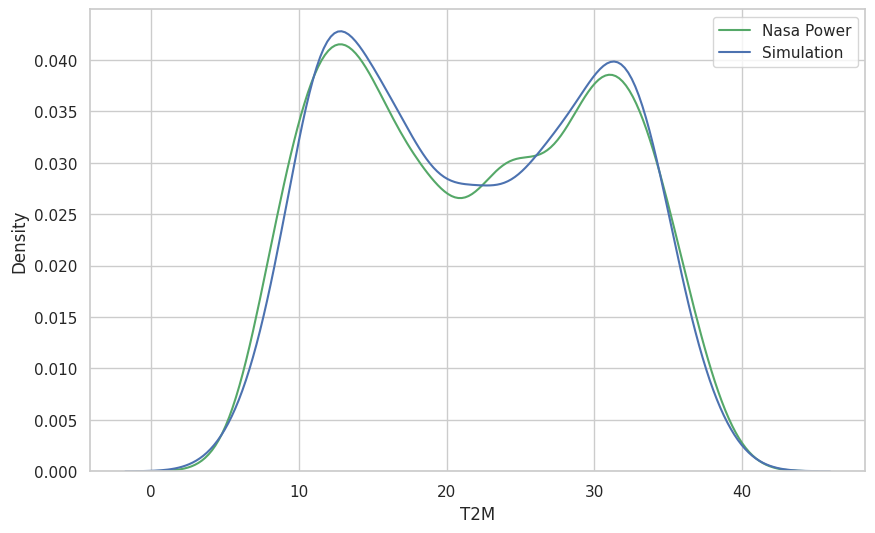

In [ ]:
# prompt: Show in a plot the distribution of T2M in df_nasa and simulated_data

import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and set its size
plt.figure(figsize=(10, 6))

# Plot the distribution of T2M in df_nasa
sns.distplot(df_nasa['T2M'], hist=False, label="Nasa Power", color='g')

# Plot the distribution of T2M in simulated_data
sns.distplot(simulated_data['T2M'], hist=False, label="Simulation", color='b')

# Add a title and axis labels
# plt.title('Distribution of T2M in df_nasa and simulated_data')
plt.xlabel('T2M')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Save the plot as a vectorial image (PDF)
plt.savefig('distribution_t2m_comparison.pdf', format='pdf')

# Show the plot
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


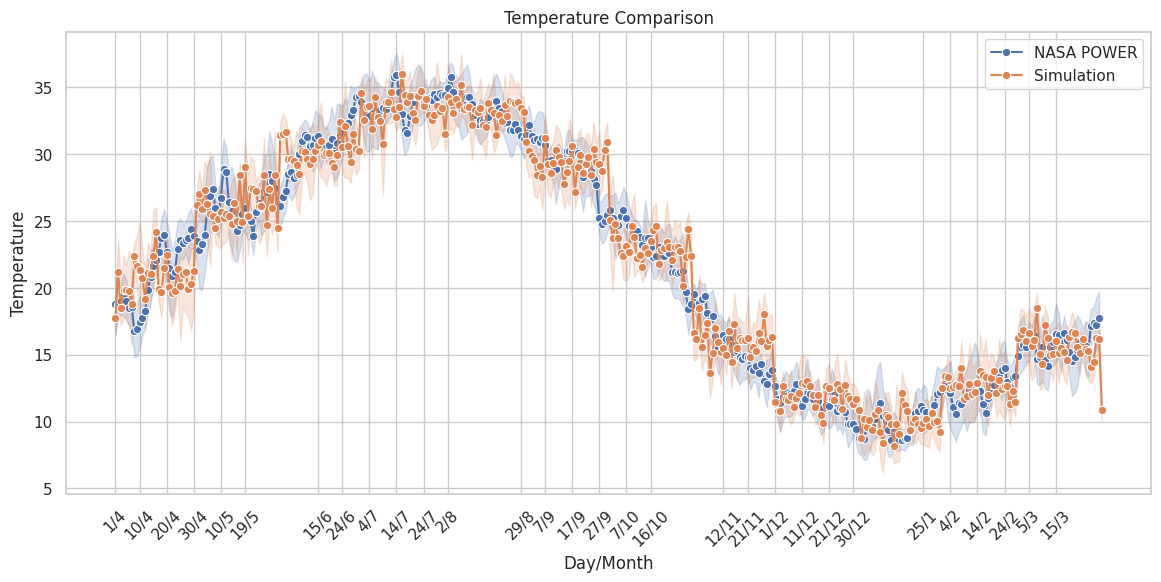

In [ ]:
from scipy.stats import pearsonr


# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(df_nasa['T2M'], simulated_data['T2M'])
percentage_similarity = (correlation_coefficient + 1) / 2 * 100  # Convert correlation coefficient to percentage

# Plotting using Seaborn
plt.figure(figsize=(14, 6))

sns.lineplot(x='day_month', y='T2M', data=df_nasa, label='NASA POWER', marker='o')
sns.lineplot(x='day_month', y='T2M', data=simulated_data, label='Simulation', marker='o')

plt.title('Temperature Comparison')
plt.xlabel('Day/Month')
plt.ylabel('Temperature')
plt.xticks(df_nasa['day_month'][::75], rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


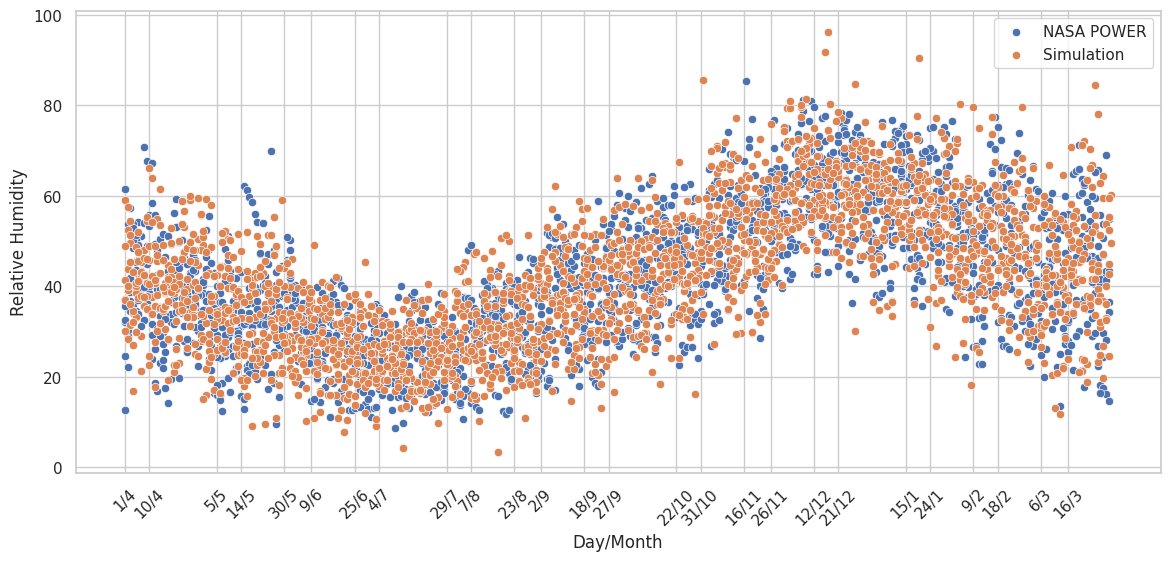

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(df_nasa['RH2M'], simulated_data['RH2M'])
percentage_similarity = (correlation_coefficient + 1) / 2 * 100  # Convert correlation coefficient to percentage

# Plotting using Seaborn
plt.figure(figsize=(14, 6))

sns.scatterplot(x='day_month', y='RH2M', data=df_nasa, label='NASA POWER', marker='o')
sns.scatterplot(x='day_month', y='RH2M', data=simulated_data, label='Simulation', marker='o')

# plt.title('Relative Humidity Comparison')
plt.xlabel('Day/Month')
plt.ylabel('Relative Humidity')
plt.xticks(df_nasa['day_month'][::85], rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Save the plot as a vectorial image (PDF)
plt.savefig('relative_humidity_comparison.pdf', format='pdf')

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


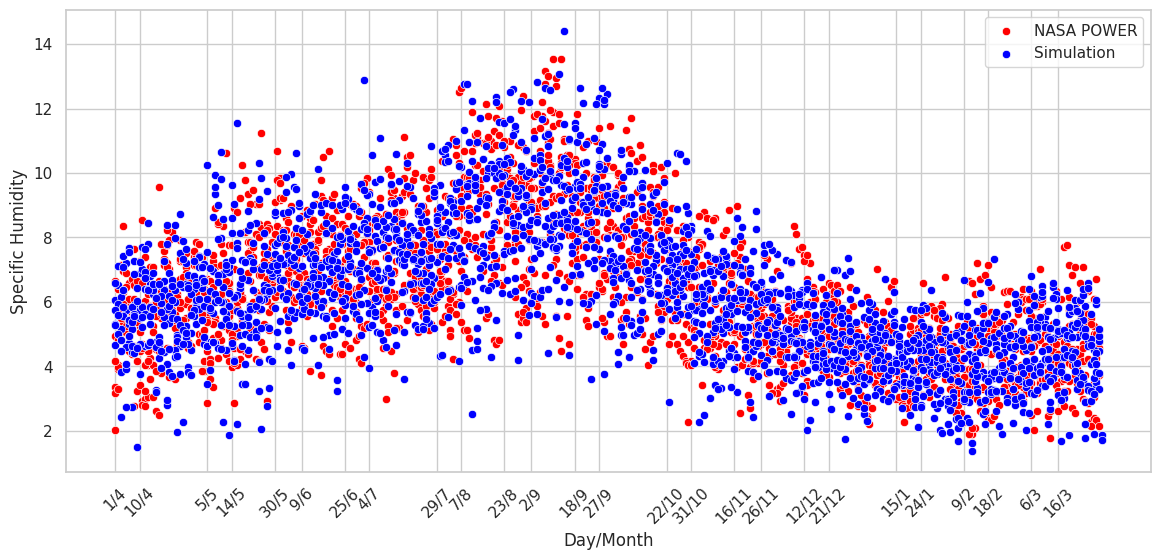

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(df_nasa['QV2M'], simulated_data['QV2M'])
percentage_similarity = (correlation_coefficient + 1) / 2 * 100  # Convert correlation coefficient to percentage

# Plotting using Seaborn
plt.figure(figsize=(14, 6))

sns.scatterplot(x='day_month', y='QV2M', data=df_nasa, label='NASA POWER', marker='o', color="red")
sns.scatterplot(x='day_month', y='QV2M', data=simulated_data, label='Simulation', marker='o', color='blue')

# plt.title('Specific Humidity Comparison')
plt.xlabel('Day/Month')
plt.ylabel('Specific Humidity')
plt.xticks(df_nasa['day_month'][::85], rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Save the plot as a vectorial image (PDF)
plt.savefig('specific_humidity_comparison.pdf', format='pdf')

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


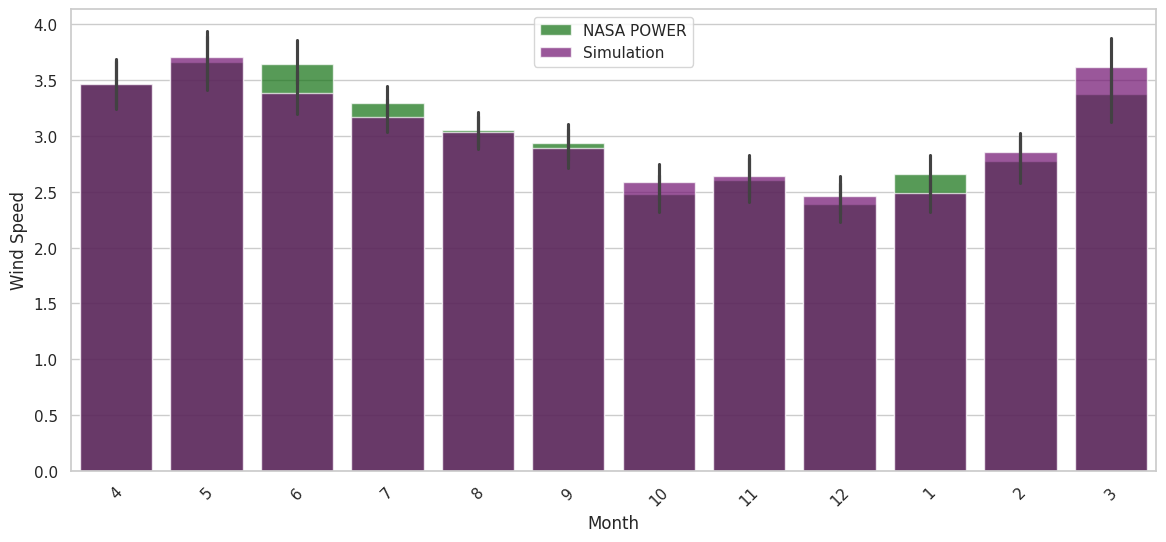

In [ ]:
# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(df_nasa['WS2M'], simulated_data['WS2M'])
percentage_similarity = (correlation_coefficient + 1) / 2 * 100  # Convert correlation coefficient to percentage

# Plotting using Seaborn
plt.figure(figsize=(14, 6))

sns.barplot(x='month', y='WS2M', data=df_nasa, label='NASA POWER', alpha=0.7, color="green")
sns.barplot(x='month', y='WS2M', data=simulated_data, label='Simulation', alpha=0.7, color="purple")

# plt.title('Wind Speed Comparison')
plt.xlabel('Month')
plt.ylabel('Wind Speed')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Save the plot as a vectorial image (PDF)
plt.savefig('wind_speed_comparison.pdf', format='pdf')

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


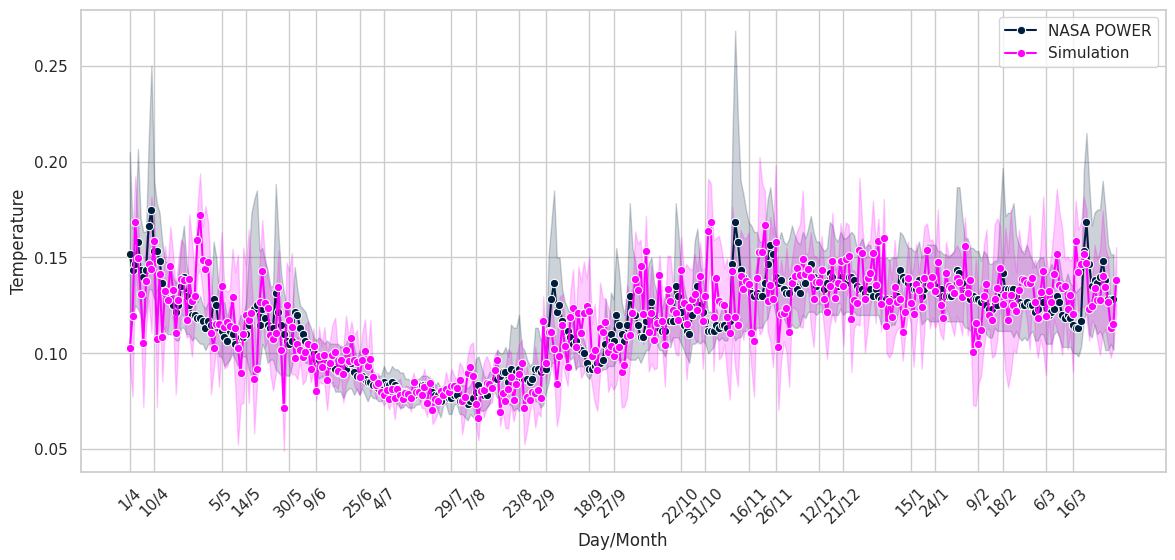

In [ ]:

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(df_nasa['GWETTOP'], simulated_data['GWETTOP'])
percentage_similarity = (correlation_coefficient + 1) / 2 * 100  # Convert correlation coefficient to percentage

# Plotting using Seaborn
plt.figure(figsize=(14, 6))

sns.lineplot(x='day_month', y='GWETTOP', data=df_nasa, label='NASA POWER', marker='o', color="#001f3f")
sns.lineplot(x='day_month', y='GWETTOP', data=simulated_data, label='Simulation', marker='o', color="#ff00ff")

# plt.title('Surface Soil Wetness Comparison')
plt.xlabel('Day/Month')
plt.ylabel('Temperature')
plt.xticks(df_nasa['day_month'][::85], rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Save the plot as a vectorial image (PDF)
plt.savefig('surface_soil_wetness_comparison.pdf', format='pdf')

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


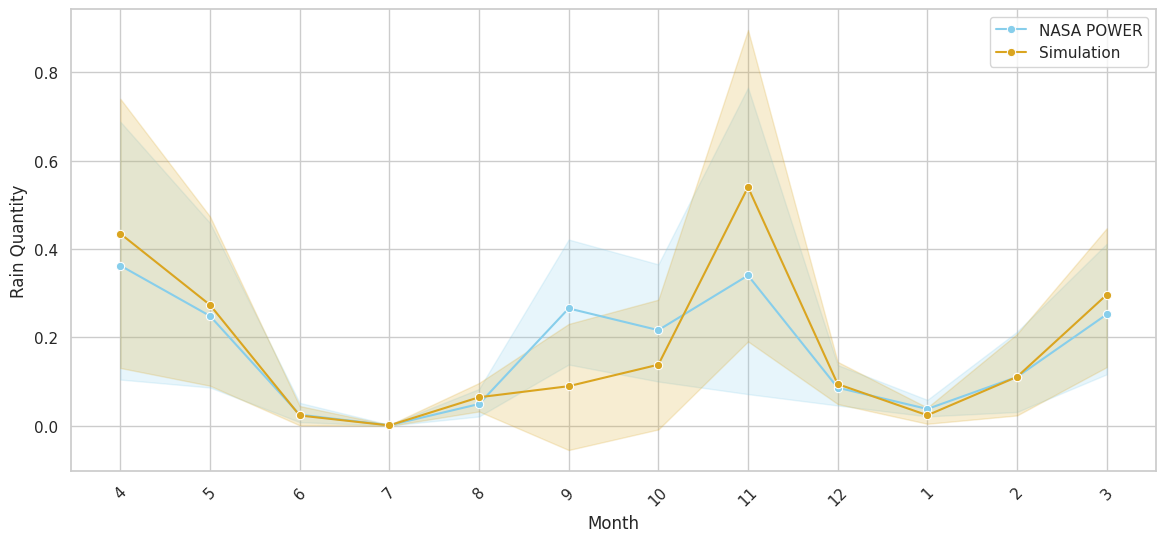

In [ ]:

# Calculate Pearson correlation coefficient and p-value
correlation_coefficient, p_value = pearsonr(df_nasa['PRECTOTCORR'], simulated_data['PRECTOTCORR'])
percentage_similarity = (correlation_coefficient + 1) / 2 * 100  # Convert correlation coefficient to percentage

# Plotting using Seaborn
plt.figure(figsize=(14, 6))

sns.lineplot(x='month', y='PRECTOTCORR', data=df_nasa, label='NASA POWER', marker='o', color="#87CEEB")
sns.lineplot(x='month', y='PRECTOTCORR', data=simulated_data, label='Simulation', marker='o', color="#DAA520")

#plt.title('Monthly Rain Quantities Comparison')
plt.xlabel('Month')
plt.ylabel('Rain Quantity')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Save the plot as a vectorial image (PDF)
plt.savefig('monthly_rain_quantities_comparison.pdf', format='pdf')

plt.show()


## validity check on synthetic time-series data

### Kolmogorov-Smirnov Test

In [ ]:
from scipy.stats import ks_2samp

ks_stat, ks_p_value = ks_2samp(df_nasa['PS'], simulated_data['PS'])
print("KS Statistic:", ks_stat, "P-Value:", ks_p_value)

KS Statistic: 0.01916058394160584 P-Value: 0.8159592854419584


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from scipy.stats import ks_2samp

variables = ['QV2M', 'WS2M', 'RH2M', 'PRECTOTCORR', 'PS', 'T2M']

for var in variables:
    ks_stat, ks_p_value = ks_2samp(df_nasa[var], simulated_data[var])
    print(f"KS Test for {var}: Statistic = {ks_stat}, P-Value = {ks_p_value}")

KS Test for QV2M: Statistic = 0.017335766423357664, P-Value = 0.8969280399723134
KS Test for WS2M: Statistic = 0.06888686131386862, P-Value = 6.039323736055259e-05
KS Test for RH2M: Statistic = 0.022354014598540146, P-Value = 0.644052957277657
KS Test for PRECTOTCORR: Statistic = 0.42472627737226276, P-Value = 1.094357452906639e-177
KS Test for PS: Statistic = 0.01916058394160584, P-Value = 0.8159592854419584
KS Test for T2M: Statistic = 0.023266423357664233, P-Value = 0.5933122579516223


### Autocorrelation Function (ACF) Test

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import acf
import matplotlib.pyplot as plt

def plot_acf(original, simulated, var_name, max_lags=40):
    acf_original = acf(original, nlags=max_lags, fft=False)
    acf_simulated = acf(simulated, nlags=max_lags, fft=False)

    fig, ax = plt.subplots(figsize=(12, 6))
    lags = np.arange(len(acf_original))

    ax.plot(lags, acf_original, label='Original Data', marker='o', markersize=4)
    ax.plot(lags, acf_simulated, label='Simulated Data', marker='s', markersize=4)

    ax.axhline(y=0, color='k', linestyle='--', alpha=0.5)
    ax.axhline(y=1.96/np.sqrt(len(original)), color='r', linestyle='--', alpha=0.5)
    ax.axhline(y=-1.96/np.sqrt(len(original)), color='r', linestyle='--', alpha=0.5)

    ax.set_xlabel('Lag', fontsize=18, fontweight='bold')
    ax.set_ylabel('Autocorrelation', fontsize=18, fontweight='bold')
   # ax.set_title(f'ACF Comparison for {var_name}', fontsize=16, fontweight='bold')

    legend = ax.legend(fontsize=18, title='Data Type', title_fontsize='16')
    ax.grid(True, alpha=0.3)

    return fig

# Assume 'df_nasa' and 'simulated_data' are defined dataframes with relevant data.
variables = ['QV2M', 'WS2M', 'RH2M', 'PRECTOTCORR', 'PS', 'T2M']

for var in variables:
    # Ensure data is numerical and handle NaN values
    original_data = pd.to_numeric(df_nasa[var], errors='coerce').dropna()
    simulated_data_var = pd.to_numeric(simulated_data[var], errors='coerce').dropna()

    # Create the plot
    fig = plot_acf(original_data, simulated_data_var, var)

    # Save the plot as a separate PDF file
    filename = f'acf_comparison_{var}.pdf'
    fig.savefig(filename, format='pdf', bbox_inches='tight', dpi=300)
    plt.close(fig)

    print(f"ACF comparison plot for {var} has been saved to '{filename}'")

print("All ACF comparison plots have been saved as separate PDF files.")


ACF comparison plot for QV2M has been saved to 'acf_comparison_QV2M.pdf'
ACF comparison plot for WS2M has been saved to 'acf_comparison_WS2M.pdf'
ACF comparison plot for RH2M has been saved to 'acf_comparison_RH2M.pdf'
ACF comparison plot for PRECTOTCORR has been saved to 'acf_comparison_PRECTOTCORR.pdf'
ACF comparison plot for PS has been saved to 'acf_comparison_PS.pdf'
ACF comparison plot for T2M has been saved to 'acf_comparison_T2M.pdf'
All ACF comparison plots have been saved as separate PDF files.


### Ljung-Box Test for Each Variable

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.stats.diagnostic import acorr_ljungbox

variables = ['QV2M', 'WS2M', 'RH2M', 'PRECTOTCORR', 'PS', 'T2M']

for var in variables:
    # Ensure the data is numerical and handle any potential NaN values
    original_data = pd.to_numeric(df_nasa[var], errors='coerce').dropna()
    simulated_data_var = pd.to_numeric(simulated_data[var], errors='coerce').dropna()

    # Perform Ljung-Box test with 10 lags
    lb_result_original = acorr_ljungbox(original_data, lags=[10], return_df=True)
    lb_result_simulated = acorr_ljungbox(simulated_data_var, lags=[10], return_df=True)

    # Extract test statistics and p-values
    lb_stat_original = lb_result_original['lb_stat'].values[0]  # Access the first element
    lb_p_value_original = lb_result_original['lb_pvalue'].values[0]  # Access the first element

    lb_stat_simulated = lb_result_simulated['lb_stat'].values[0]  # Access the first element
    lb_p_value_simulated = lb_result_simulated['lb_pvalue'].values[0]  # Access the first element

    # Print results with proper formatting
    print(f"Ljung-Box test results for {var}:")
    print(f"  Original data:")
    print(f"    Test statistic: {lb_stat_original:.6f}")
    print(f"    p-value: {lb_p_value_original}")

    print(f"  Simulated data:")
    print(f"    Test statistic: {lb_stat_simulated:.6f}")
    print(f"    p-value: {lb_p_value_simulated}")

    print()  # Add a blank line for readability


Ljung-Box test results for QV2M:
  Original data:
    Test statistic: 8436.294040
    p-value: 0.0
  Simulated data:
    Test statistic: 6454.828273
    p-value: 0.0

Ljung-Box test results for WS2M:
  Original data:
    Test statistic: 885.714126
    p-value: 7.557806993749558e-184
  Simulated data:
    Test statistic: 194.230091
    p-value: 2.5732213616271142e-36

Ljung-Box test results for RH2M:
  Original data:
    Test statistic: 9081.925056
    p-value: 0.0
  Simulated data:
    Test statistic: 6955.852228
    p-value: 0.0

Ljung-Box test results for PRECTOTCORR:
  Original data:
    Test statistic: 306.963573
    p-value: 5.237392960326425e-60
  Simulated data:
    Test statistic: 25.068198
    p-value: 0.005217726385361267

Ljung-Box test results for PS:
  Original data:
    Test statistic: 6372.850303
    p-value: 0.0
  Simulated data:
    Test statistic: 2491.903286
    p-value: 0.0

Ljung-Box test results for T2M:
  Original data:
    Test statistic: 19265.496055
    p-valu

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Augmented Dickey-Fuller (ADF) Test

In [ ]:
from statsmodels.tsa.stattools import adfuller

for var in variables:
    # Perform ADF test on original data
    adf_stat_original, adf_p_value_original, adf_lags_original, adf_obs_original, adf_critical_values_original, adf_ic_best_original = adfuller(df_nasa[var])

    # Perform ADF test on simulated data
    adf_stat_simulated, adf_p_value_simulated, adf_lags_simulated, adf_obs_simulated, adf_critical_values_simulated, adf_ic_best_simulated = adfuller(simulated_data[var])

    # Print ADF results for original data
    print(f"ADF Test Results for {var} (Original Data):")
    print(f"  Test Statistic: {adf_stat_original}")
    print(f"  p-value: {adf_p_value_original}")
    print(f"  Number of Lags Used: {adf_lags_original}")
    print(f"  Number of Observations Used: {adf_obs_original}")
    print(f"  Critical Values: {adf_critical_values_original}")
    print(f"  Information Criterion (if used): {adf_ic_best_original}")
    print()

    # Print ADF results for simulated data
    print(f"ADF Test Results for {var} (Synthetic Data):")
    print(f"  Test Statistic: {adf_stat_simulated}")
    print(f"  p-value: {adf_p_value_simulated}")
    print(f"  Number of Lags Used: {adf_lags_simulated}")
    print(f"  Number of Observations Used: {adf_obs_simulated}")
    print(f"  Critical Values: {adf_critical_values_simulated}")
    print(f"  Information Criterion (if used): {adf_ic_best_simulated}")
    print()


ADF Test Results for QV2M (Original Data):
  Test Statistic: -3.6911328985297973
  p-value: 0.004239620774957317
  Number of Lags Used: 19
  Number of Observations Used: 2172
  Critical Values: {'1%': -3.4333642933695216, '5%': -2.862871610424875, '10%': -2.567478882724717}
  Information Criterion (if used): 6644.935428720234

ADF Test Results for QV2M (Synthetic Data):
  Test Statistic: -2.710831530435279
  p-value: 0.07218262267806642
  Number of Lags Used: 19
  Number of Observations Used: 2172
  Critical Values: {'1%': -3.4333642933695216, '5%': -2.862871610424875, '10%': -2.567478882724717}
  Information Criterion (if used): 7974.715371814634

ADF Test Results for WS2M (Original Data):
  Test Statistic: -7.730656265515721
  p-value: 1.1277350090206866e-11
  Number of Lags Used: 16
  Number of Observations Used: 2175
  Critical Values: {'1%': -3.4333601308010926, '5%': -2.8628697724738688, '10%': -2.5674779041352886}
  Information Criterion (if used): 6853.417162060567

ADF Test Re

### Cross-Correlation Function (CCF) Test Between Variable Pairs

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.stattools import ccf
import matplotlib.pyplot as plt

def plot_ccf(original_var1, original_var2, simulated_var1, simulated_var2, var1_name, var2_name, max_lags=40):
    ccf_original = ccf(original_var1, original_var2, adjusted=False)[:max_lags+1]
    ccf_simulated = ccf(simulated_var1, simulated_var2, adjusted=False)[:max_lags+1]

    lags = np.arange(0, max_lags + 1)

    fig, ax = plt.subplots(figsize=(14, 7))

    ax.plot(lags, ccf_original, label='Original Data', marker='o', markersize=4)
    ax.plot(lags, ccf_simulated, label='Simulated Data', marker='s', markersize=4)

    ax.axhline(y=0, color='k', linestyle='--', alpha=0.5)
    ax.axvline(x=0, color='k', linestyle='--', alpha=0.5)
    confidence_interval = 1.96 / np.sqrt(len(original_var1))
    ax.axhline(y=confidence_interval, color='r', linestyle='--', alpha=0.5)
    ax.axhline(y=-confidence_interval, color='r', linestyle='--', alpha=0.5)

    ax.set_xlabel('Lag', fontsize=16, fontweight='bold')
    ax.set_ylabel('Cross-Correlation', fontsize=16, fontweight='bold')
    # ax.set_title(f'CCF Comparison: {var1_name} vs {var2_name}')
    ax.legend(fontsize=16, title='Data Type', title_fontsize='13')
    ax.grid(True, alpha=0.3)

    return fig

# Define the variable pairs
pairs = [('T2M', 'QV2M'), ('WS2M', 'RH2M'), ('PRECTOTCORR', 'PS')]

for (var1, var2) in pairs:
    # Ensure data is numerical and handle NaN values
    original_var1 = pd.to_numeric(df_nasa[var1], errors='coerce').dropna()
    original_var2 = pd.to_numeric(df_nasa[var2], errors='coerce').dropna()
    simulated_var1 = pd.to_numeric(simulated_data[var1], errors='coerce').dropna()
    simulated_var2 = pd.to_numeric(simulated_data[var2], errors='coerce').dropna()

    # Ensure both variables have the same length
    min_length = min(len(original_var1), len(original_var2), len(simulated_var1), len(simulated_var2))
    original_var1 = original_var1[:min_length]
    original_var2 = original_var2[:min_length]
    simulated_var1 = simulated_var1[:min_length]
    simulated_var2 = simulated_var2[:min_length]

    # Create the plot
    fig = plot_ccf(original_var1, original_var2, simulated_var1, simulated_var2, var1, var2)

    # Save the plot as a separate PDF file
    filename = f'ccf_comparison_{var1}_vs_{var2}.pdf'
    fig.savefig(filename, format='pdf', bbox_inches='tight', dpi=300)
    plt.close(fig)

    print(f"CCF comparison plot for {var1} vs {var2} has been saved to '{filename}'")

print("All CCF comparison plots have been saved as separate PDF files.")


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


CCF comparison plot for T2M vs QV2M has been saved to 'ccf_comparison_T2M_vs_QV2M.pdf'
CCF comparison plot for WS2M vs RH2M has been saved to 'ccf_comparison_WS2M_vs_RH2M.pdf'
CCF comparison plot for PRECTOTCORR vs PS has been saved to 'ccf_comparison_PRECTOTCORR_vs_PS.pdf'
All CCF comparison plots have been saved as separate PDF files.


### Distributional Tests for Each Variable (Anderson-Darling Test)

In [ ]:
from scipy.stats import anderson_ksamp

for var in variables:
    result = anderson_ksamp([df_nasa[var], simulated_data[var]]) # Store the result as a tuple
    ad_stat = result.statistic  # Access the statistic
    ad_critical_values = result.critical_values  # Access the critical values
    ad_significance_level = result.significance_level # Access the significance level
    print(f"Anderson-Darling Test for {var}: Statistic = {ad_stat}, Critical Values = {ad_critical_values}, Significance Level = {ad_significance_level}")

Anderson-Darling Test for QV2M: Statistic = -0.6834127422483701, Critical Values = [0.325 1.226 1.961 2.718 3.752 4.592 6.546], Significance Level = 0.25
Anderson-Darling Test for WS2M: Statistic = 14.890430794275433, Critical Values = [0.325 1.226 1.961 2.718 3.752 4.592 6.546], Significance Level = 0.001
Anderson-Darling Test for RH2M: Statistic = -0.5693325311096796, Critical Values = [0.325 1.226 1.961 2.718 3.752 4.592 6.546], Significance Level = 0.25
Anderson-Darling Test for PRECTOTCORR: Statistic = 361.9419884778463, Critical Values = [0.325 1.226 1.961 2.718 3.752 4.592 6.546], Significance Level = 0.001
Anderson-Darling Test for PS: Statistic = -0.2559762431211622, Critical Values = [0.325 1.226 1.961 2.718 3.752 4.592 6.546], Significance Level = 0.25
Anderson-Darling Test for T2M: Statistic = -0.32597293799206856, Critical Values = [0.325 1.226 1.961 2.718 3.752 4.592 6.546], Significance Level = 0.25


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-84-3534ed18682d>:4: UserWarning: p-value capped: true value larger than 0.25. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  result = anderson_ksamp([df_nasa[var], simulated_data[var]]) # Store the result as a tuple
<ipython-input-84-3534ed18682d>:4: UserWarning: p-value floored: true value smaller than 0.001. Consider specifying `method` (e.g. `method=stats.PermutationMethod()`.)
  result = anderson_ksamp([df_nasa[var], simulated_data[var]]) # Store the result as a tuple


### Visual Inspection for Each Variable

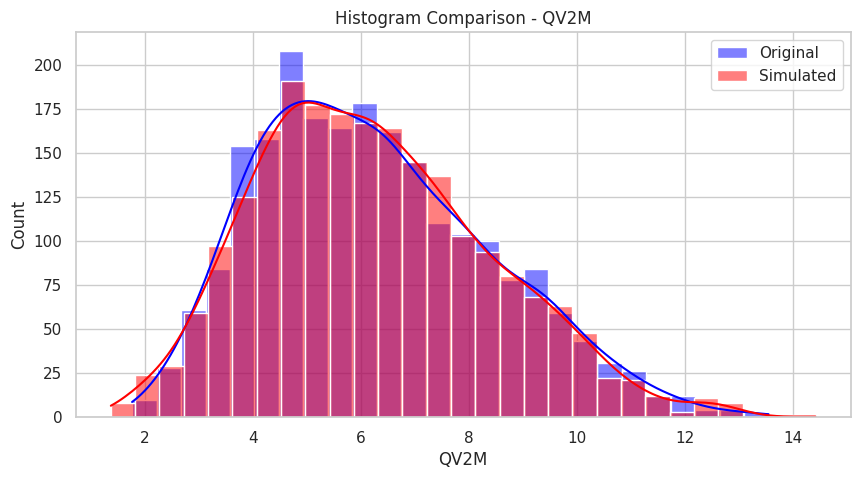

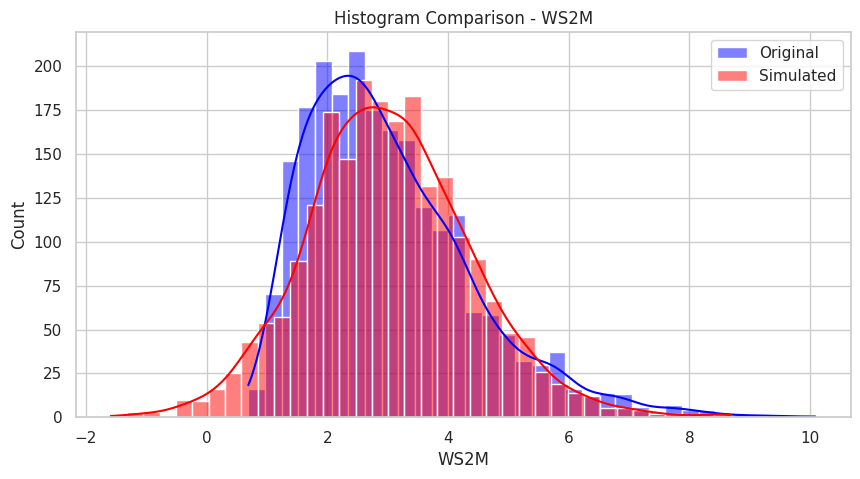

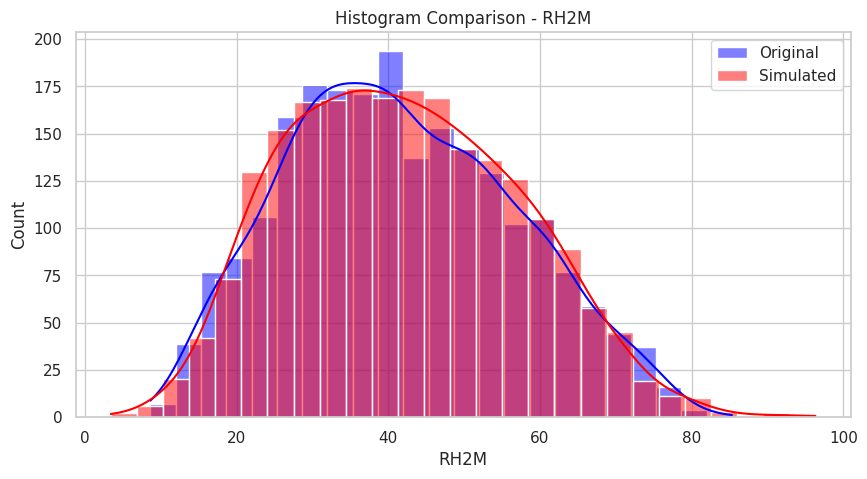

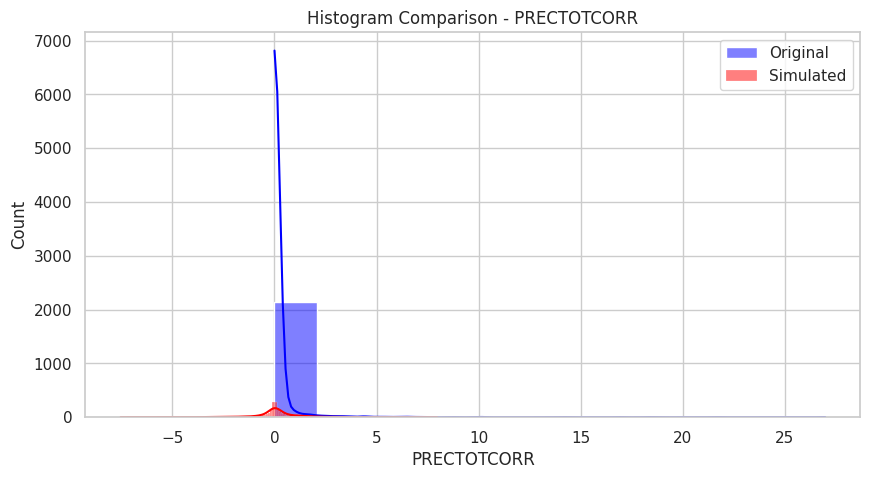

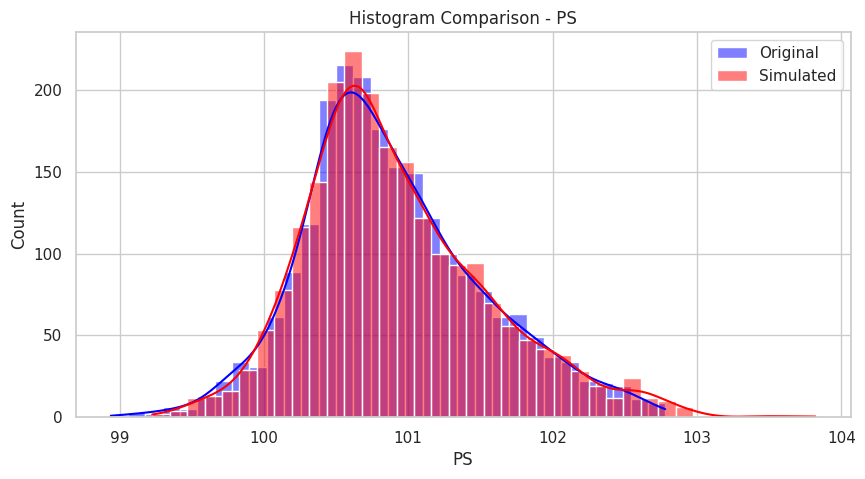

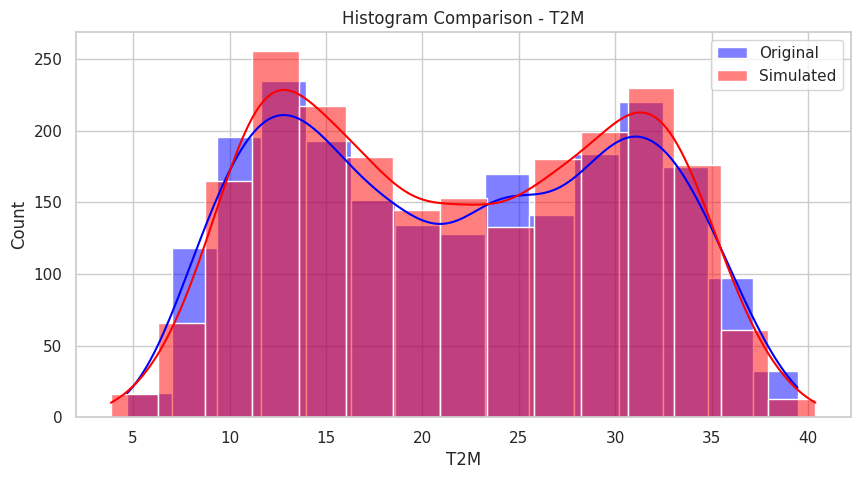

In [ ]:
import seaborn as sns

for var in variables:
    plt.figure(figsize=(10, 5))
    sns.histplot(df_nasa[var], color="blue", label="Original", kde=True)
    sns.histplot(simulated_data[var], color="red", label="Synthetic", kde=True)
    plt.title(f'Histogram Comparison - {var}')
    plt.legend()
    plt.show()

### Trend Analysis for Each Variable

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


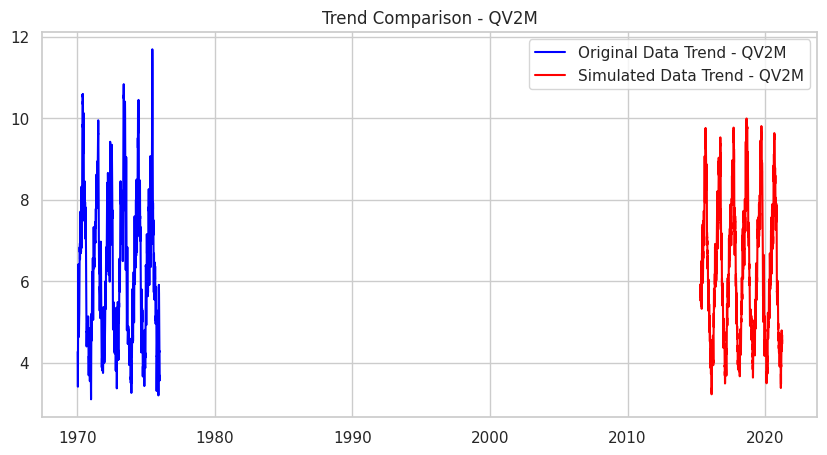

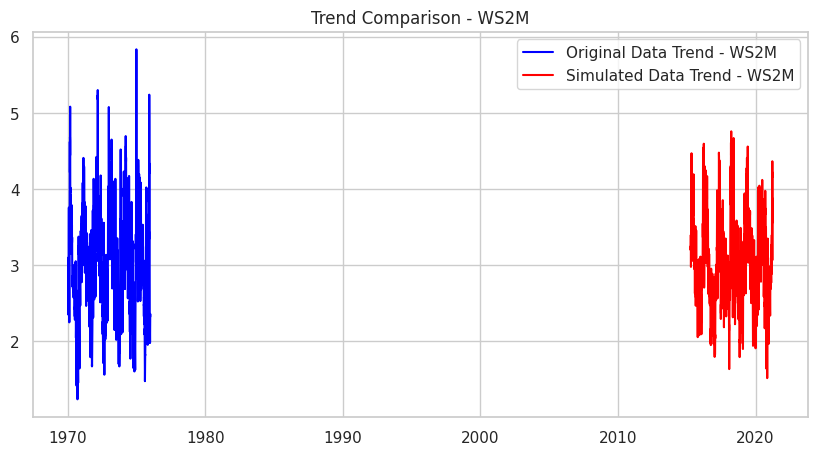

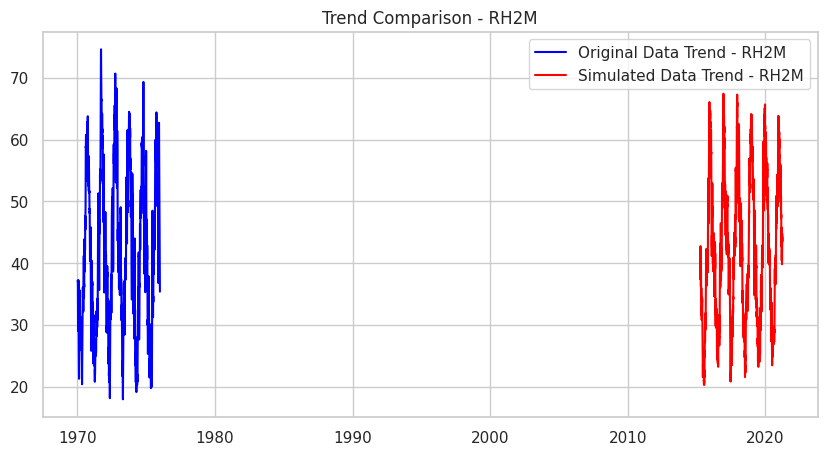

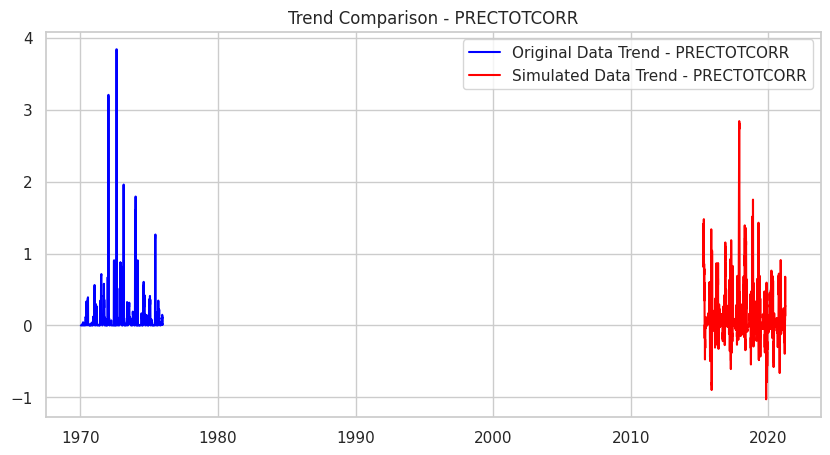

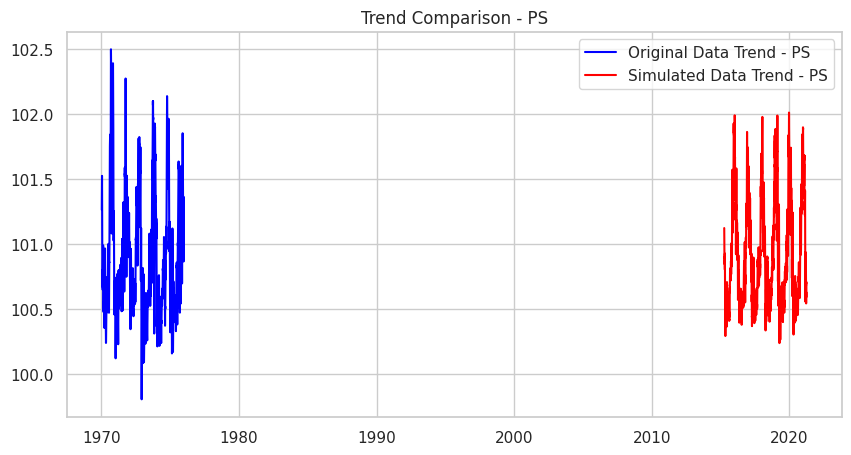

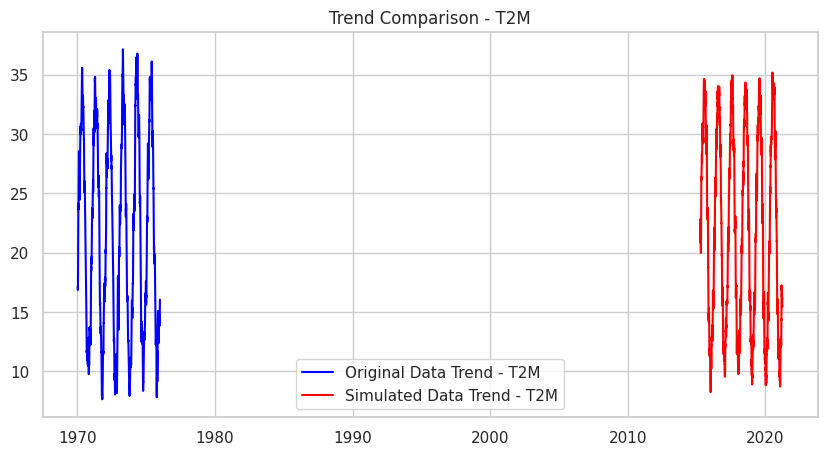

In [ ]:
for var in variables:
    plt.figure(figsize=(10, 5))
    plt.plot(df_nasa[var].rolling(window=12).mean(), label=f'Original Data Trend - {var}', color='blue')
    plt.plot(simulated_data[var].rolling(window=12).mean(), label=f'Simulated Data Trend - {var}', color='red')
    plt.title(f'Trend Comparison - {var}')
    plt.legend()
    plt.show()

###Correlation Analysis



In [ ]:
# Ensure the data is numeric (force conversion if necessary)
simulated_data['RH2M'] = pd.to_numeric(simulated_data['RH2M'], errors='coerce')
simulated_data['T2M'] = pd.to_numeric(simulated_data['T2M'], errors='coerce')

In [ ]:
correlation_comparison = pd.DataFrame({
    'Real Correlation': df_nasa.corr().loc['T2M', 'RH2M'],
    'Synthetic Correlation': simulated_data.corr().loc['T2M', 'RH2M']
}, index=['T2M-RH2M Correlation'])
correlation_comparison

ValueError: could not convert string to float: 'sandy'

### Descriptive Statistics


In [ ]:
import pandas as pd

# Assuming df_nasa and simulated_data are your DataFrames
# Select only the specified columns
columns = ['T2M', 'RH2M', 'WS2M', 'QV2M', 'PS', 'PRECTOTCORR']
real_selected = df_nasa[columns]
synthetic_selected = simulated_data[columns]

# Calculate means and standard deviations for the selected columns
comparison_stats = pd.DataFrame({
    'Real Mean': real_selected.mean(),
    'Synthetic Mean': synthetic_selected.mean(),
    'Real StdDev': real_selected.std(),
    'Synthetic StdDev': synthetic_selected.std()
})

comparison_stats